
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

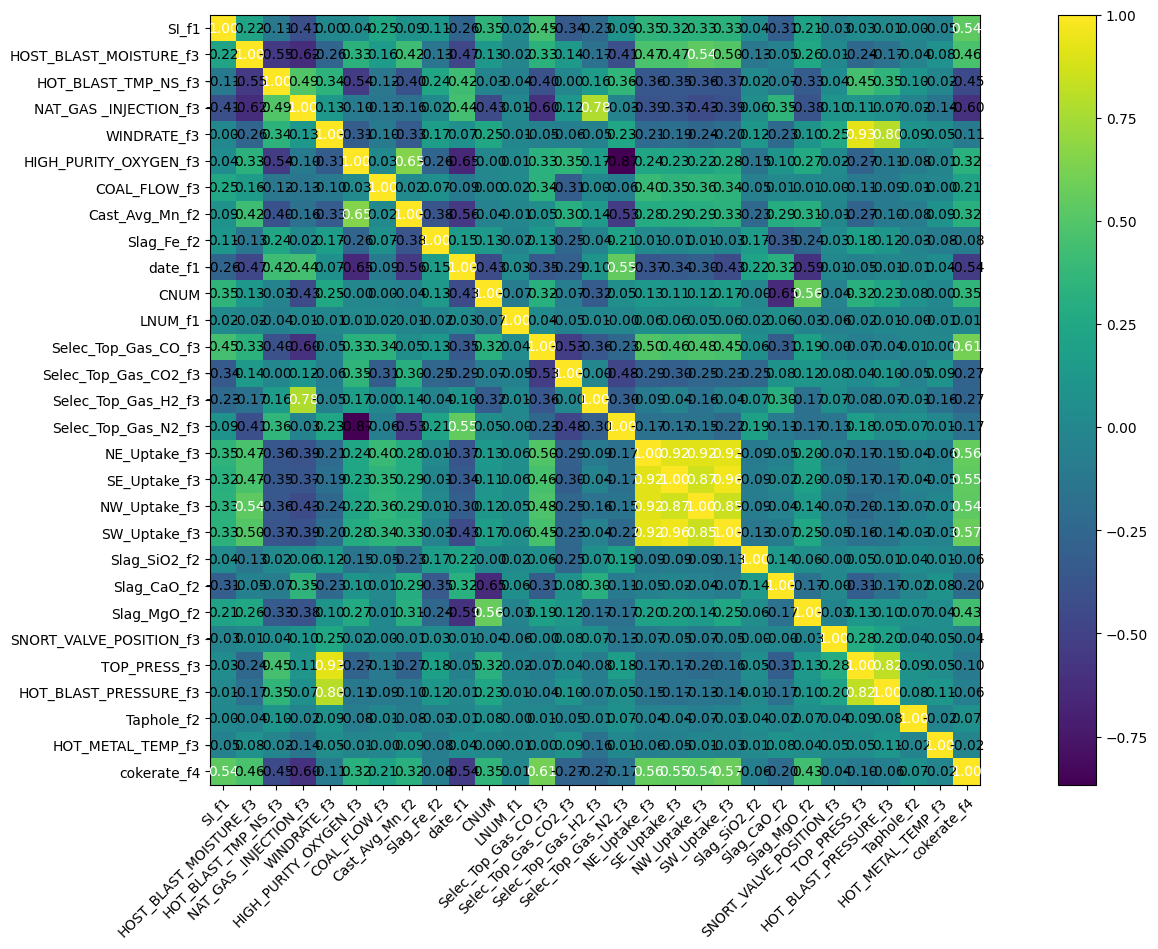

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Pass Wrangled data to GPT experimenter


In [14]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [15]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)

    sdtw_criterion = SoftDTW(use_cuda=True, gamma=0.1)

    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
      
        ###########################################
        
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   

        ###########################################
        
        ## loss_change_pred = loss_change_pred[ :, : 10 ]
        ## loss_change_real = loss_change_real[ :, : 10 ]
        ## T = loss_change_pred.shape[1] + 1   ## remove rc

        ###########################################
        
        loss_A = 0 ### 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 ### 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 ### 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )

        ############################################
        
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        #######################################################
  
        loss_DTW = sdtw_criterion(loss_change_pred.reshape(B,(T-1), E )[:,:, 2:3], loss_change_real.reshape(B, (T-1),E )[:, :, 2:3] )  
        ## loss_DTW = ( loss_DTW )**2
        loss_DTW = loss_DTW.mean()  

        #######################################################

        ## Curve_SIMs[1] 

        loss_total = loss_DTW        ## * 0.001 + Curve_SIMs[3]     ## loss_SI
        
        #######################################################
        
        optimizer.zero_grad( set_to_none=True )    
        loss = loss_total          
        loss.backward()
        optimizer.step()
        
        #######################################################
        
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        #history['loss_SIM2'].append( Curve_SIMs[2] )
        #history['loss_SIM3'].append( Curve_SIMs[3] )
        #history['loss_SIM4'].append( Curve_SIMs[4] )
        #history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
            print(Curve_SIMs)
            print("loss_SI...", [ loss_SI  ] )
            print("loss_all..", [ loss_all ] )
            print("loss_DTW..", loss_DTW     )
            print("loss_total..", loss_total )
            print("*************************")
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [16]:

'''

batch_size, len_x, len_y, dims = 8, 15, 12, 5
x = torch.rand((batch_size, len_x, dims), requires_grad=True)
y = torch.rand((batch_size, len_y, dims))
x.shape
x[1, 1, :5]

'''


'\n\nbatch_size, len_x, len_y, dims = 8, 15, 12, 5\nx = torch.rand((batch_size, len_x, dims), requires_grad=True)\ny = torch.rand((batch_size, len_y, dims))\nx.shape\nx[1, 1, :5]\n\n'

In [17]:

## x[1, 1, 2:3]


In [18]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  5.482328414916992
seq length of pred =  10
[2.12629267 1.60189148 4.05510037 7.82846159 0.65272186 0.44601076]
loss_SI... [tensor(1.3054, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.0007, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(5.4823, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(5.4823, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.0037617338821291924
seq length of pred =  10
[0.42053978 0.49057806 0.96437685 1.49551862 0.07548131 0.08642175]
loss_SI... [tensor(0.1510, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9614, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.0038, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.0038, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.14230193197727203
seq length of pred =  10
[0.45172581 0.69195485 1.7003396  2.29363789 0.19025387 

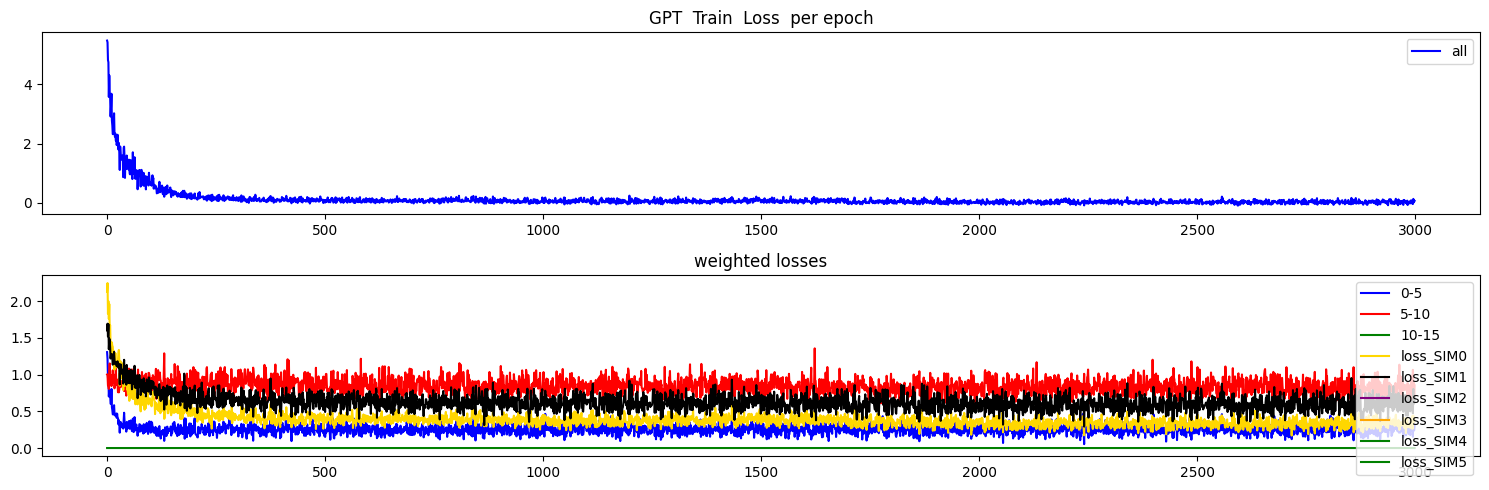

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.05000128597021103
Test MSE Loss - SI only 0-5:  0.06766651570796967
Test MSE Loss - SI only 5-10:  0.05061272904276848
Test MSE Loss - SI only 10-15:  0.03632929176092148
mae, mse, rmse, mape, mspe, rse, corr
(0.18781918, 0.050001286, 0.22360967, 1.2072194, 2.1144474, 1.1795654)
Testing R**2 - SI only:  -0.39137452081663127
Testing R**2 - SI only:  -0.39137452081663127
Testing R**2 - All features:  0.9929358390124766
Testing R**2 - (f2) - SI full:  -0.5079423374733787


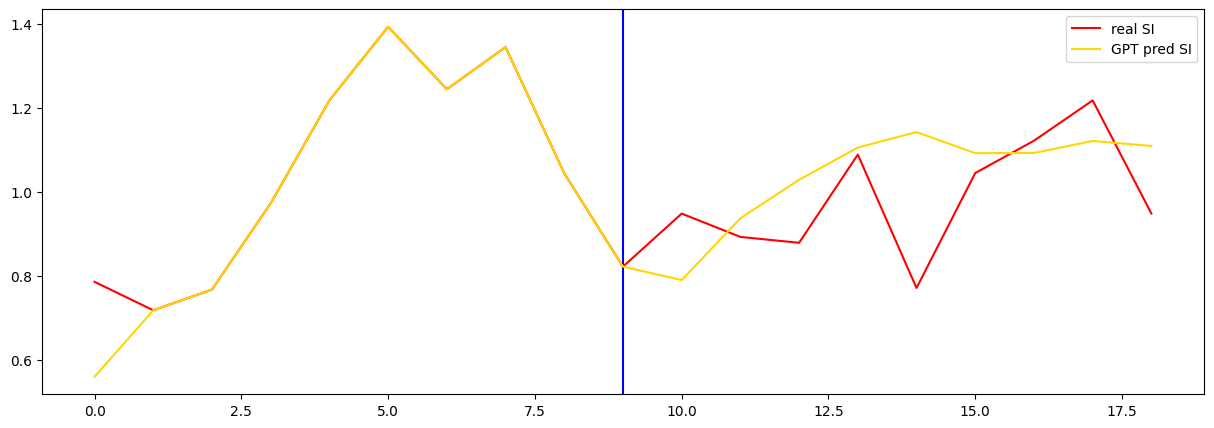

In [19]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  7.39045524597168
seq length of pred =  10
[1.54608925 1.97579687 3.7382007  8.22658022 0.69751628 0.4654774 ]
loss_SI... [tensor(1.3950, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.6949, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(7.3905, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(7.3905, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.1832391768693924
seq length of pred =  10
[0.38961123 0.19352157 0.36455015 0.73118721 0.00557646 0.04062151]
loss_SI... [tensor(0.0112, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.5448, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.1832, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.1832, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.21164166927337646
seq length of pred =  10
[0.31487062 0.17769088 0.32294205 0.70061775 0.00501848 

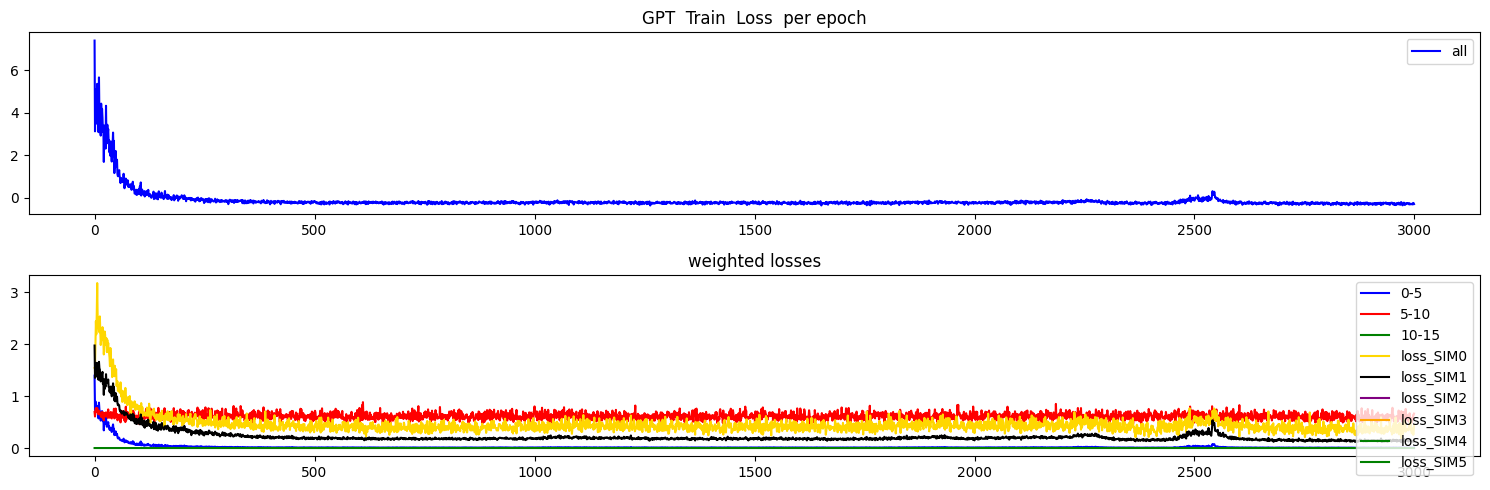

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.05027385801076889
Test MSE Loss - SI only 0-5:  0.06766651570796967
Test MSE Loss - SI only 5-10:  0.05255315452814102
Test MSE Loss - SI only 10-15:  0.035424649715423584
mae, mse, rmse, mape, mspe, rse, corr
(0.18864177, 0.050273854, 0.22421832, 1.2873069, 2.2652066, 1.1827761)
Testing R**2 - SI only:  -0.39895928553352644
Testing R**2 - SI only:  -0.39895928553352644
Testing R**2 - All features:  0.9597957082879424
Testing R**2 - (f2) - SI full:  -2.0778095212590526


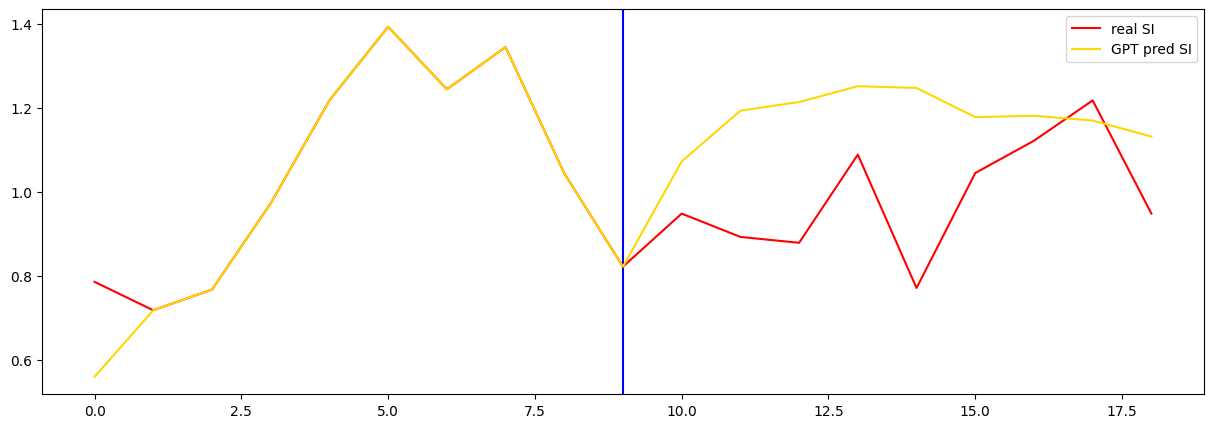

In [20]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  5.560904502868652
seq length of pred =  10
[2.4287404  1.72889684 3.62555023 6.73791118 0.5341027  0.37465161]
loss_SI... [tensor(1.0682, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7549, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(5.5609, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(5.5609, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.11504022777080536
seq length of pred =  10
[0.28864711 0.21653396 0.43622411 0.88696405 0.0080192  0.04927578]
loss_SI... [tensor(0.0160, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8202, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.1150, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.1150, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.1705564558506012
seq length of pred =  10
[0.24446194 0.1556698  0.28072686 0.56302456 0.00373221

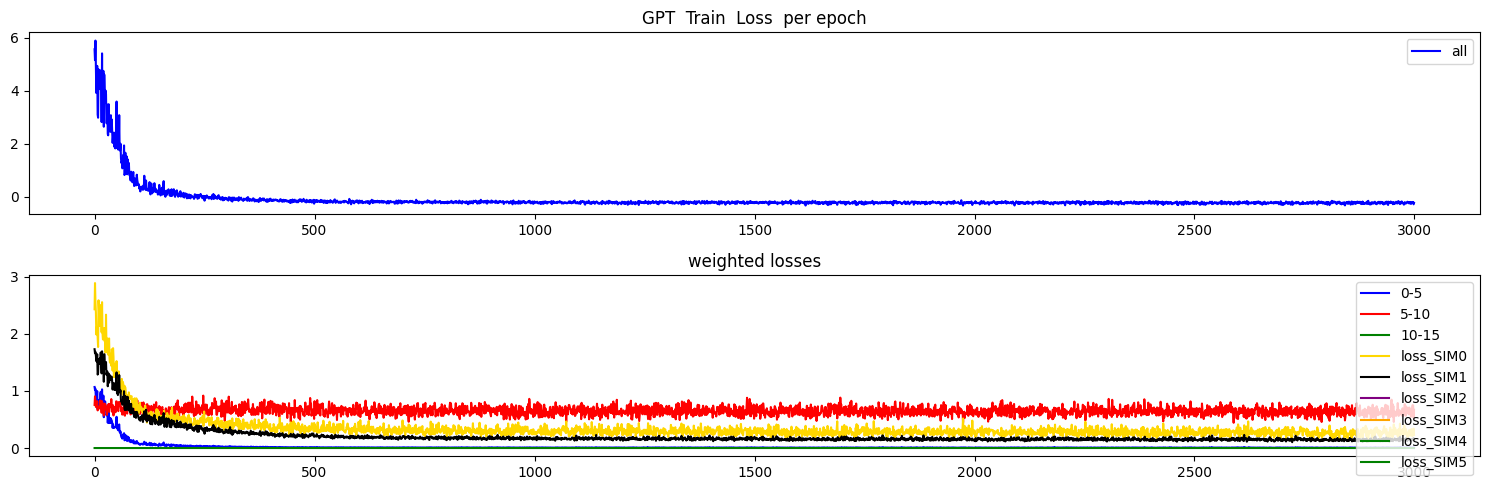

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.05262960121035576
Test MSE Loss - SI only 0-5:  0.06766651570796967
Test MSE Loss - SI only 5-10:  0.05621412396430969
Test MSE Loss - SI only 10-15:  0.04071550816297531
mae, mse, rmse, mape, mspe, rse, corr
(0.1937626, 0.0526296, 0.22941142, 1.2435389, 2.1891596, 1.2101703)
Testing R**2 - SI only:  -0.46451212546062326
Testing R**2 - SI only:  -0.46451212546062326
Testing R**2 - All features:  0.9952609826312578
Testing R**2 - (f2) - SI full:  -5.382329557761624


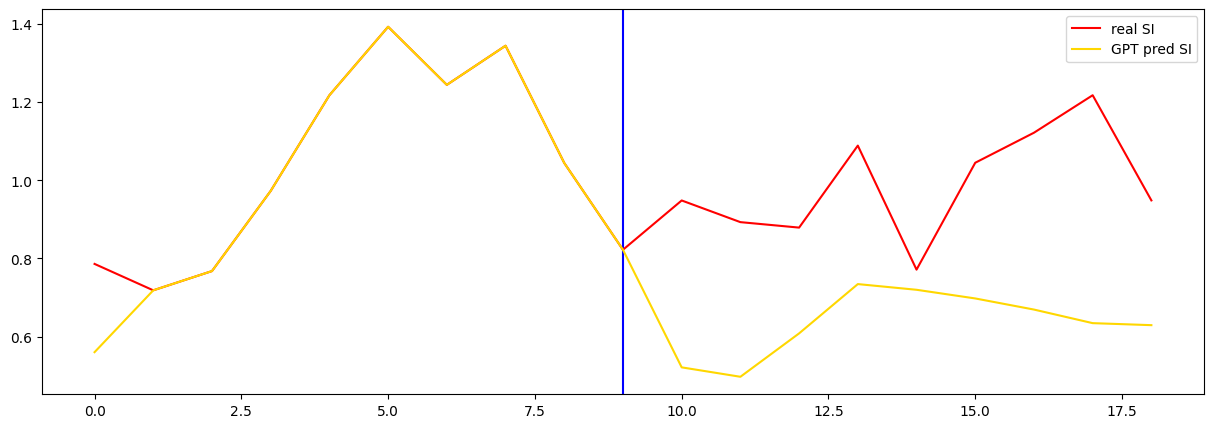

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  5.625019550323486
seq length of pred =  10
[2.21283154 1.71474274 3.73594609 6.66384629 0.51442841 0.37021368]
loss_SI... [tensor(1.0289, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8902, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(5.6250, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(5.6250, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.08861201256513596
seq length of pred =  10
[0.27951113 0.24737862 0.52993906 0.88648933 0.00878716 0.04924941]
loss_SI... [tensor(0.0176, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7824, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.0886, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.0886, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.17433342337608337
seq length of pred =  10
[0.26094351 0.19747415 0.33292701 0.64755499 0.0057353

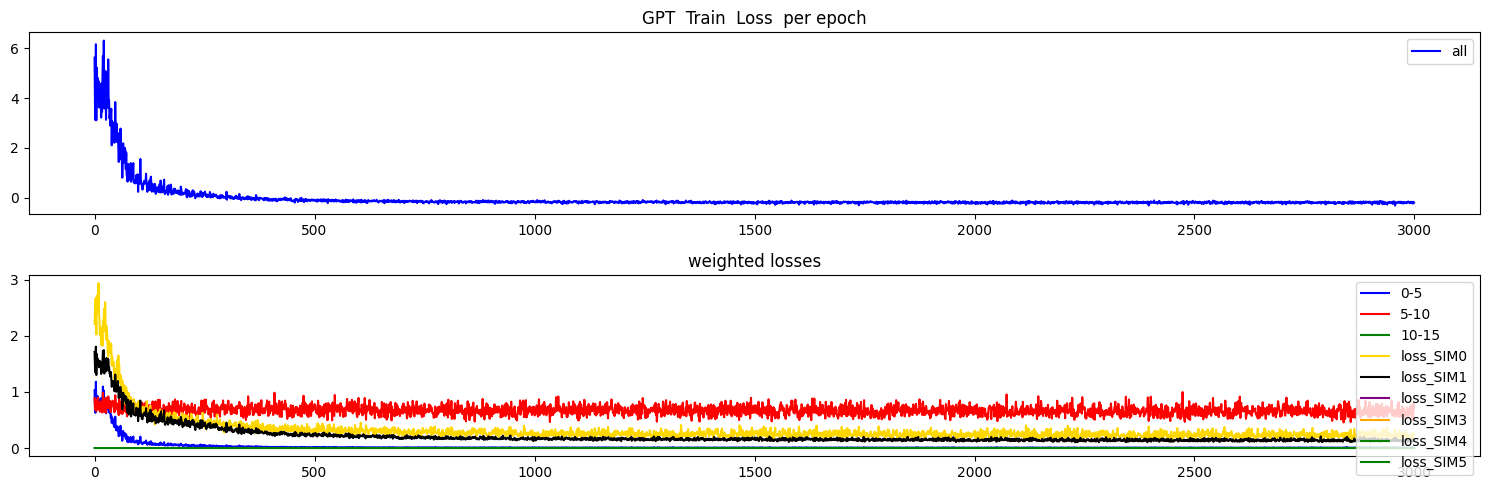

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.05533548444509506
Test MSE Loss - SI only 0-5:  0.06766651570796967
Test MSE Loss - SI only 5-10:  0.060801029205322266
Test MSE Loss - SI only 10-15:  0.04641095548868179
mae, mse, rmse, mape, mspe, rse, corr
(0.19630043, 0.055335477, 0.23523495, 1.589505, 4.3661633, 1.24089)
Testing R**2 - SI only:  -0.5398081047914576
Testing R**2 - SI only:  -0.5398081047914576
Testing R**2 - All features:  0.9770855577005506
Testing R**2 - (f2) - SI full:  -0.7928776623324045


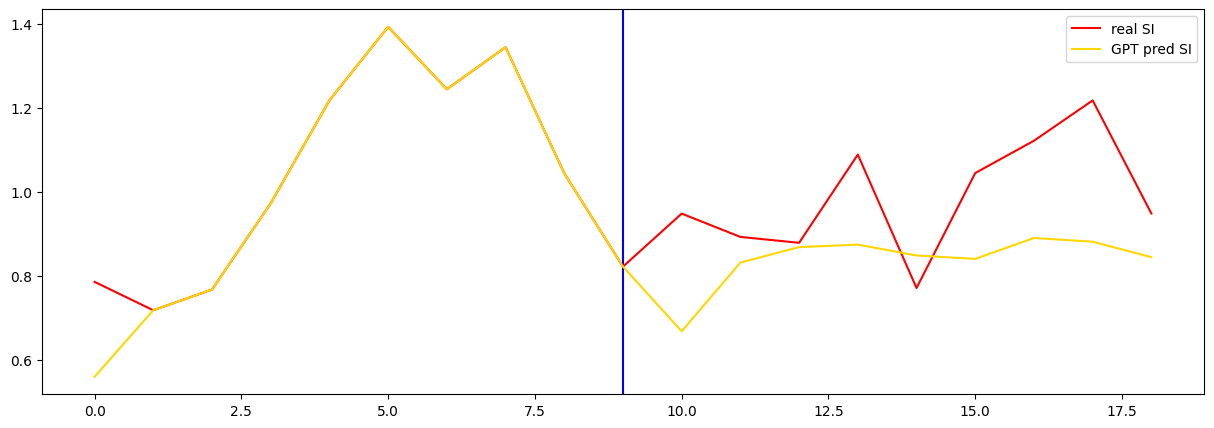

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )



## Run 2


In [23]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  3.3645811080932617
seq length of pred =  10
[1.79614376 1.32463883 2.51549337 5.67728717 0.33101453 0.31672719]
loss_SI... [tensor(0.6620, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8394, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(3.3646, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(3.3646, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.302359402179718
seq length of pred =  10
[0.40981912 0.29115767 0.71189555 1.1554546  0.10599387 0.07842609]
loss_SI... [tensor(0.2120, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7365, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.3024, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.3024, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.2544526755809784
seq length of pred =  10
[0.3756469  0.32939441 0.78973378 1.17939749 0.10662745 

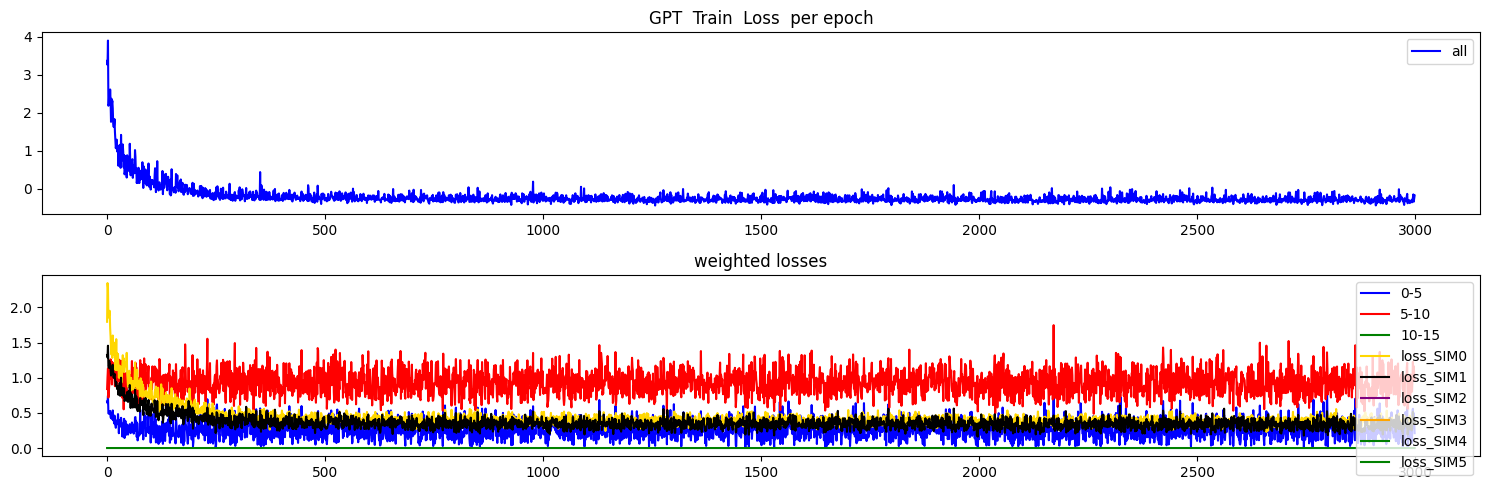

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.0495021678507328
Test MSE Loss - SI only 0-5:  0.014459277503192425
Test MSE Loss - SI only 5-10:  0.04315989091992378
Test MSE Loss - SI only 10-15:  0.08906354755163193
mae, mse, rmse, mape, mspe, rse, corr
(0.18340178, 0.04950217, 0.22249083, 3.3244598, 33.56458, 1.8290397)
Testing R**2 - SI only:  -2.345386015953618
Testing R**2 - SI only:  -2.345386015953618
Testing R**2 - All features:  0.995648506676896
Testing R**2 - (f2) - SI full:  -6.495802478015312


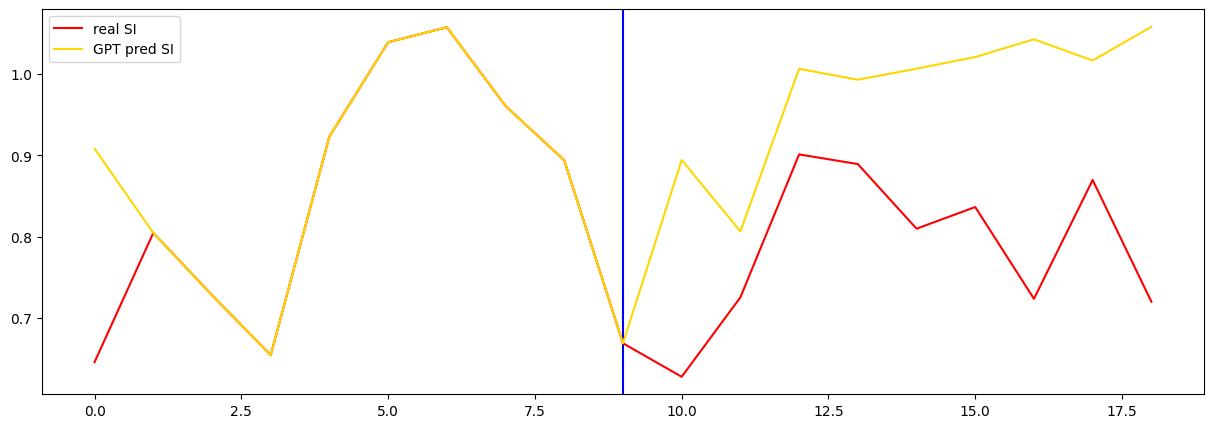

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  3.710543632507324
seq length of pred =  10
[1.58293072 1.47160902 3.55110867 6.5777926  0.43989707 0.36697661]
loss_SI... [tensor(0.8798, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7263, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(3.7105, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(3.7105, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.1674811840057373
seq length of pred =  10
[0.32772277 0.24223565 0.44824462 0.81300585 0.00900156 0.04516699]
loss_SI... [tensor(0.0180, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3460, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.1675, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.1675, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.3010569214820862
seq length of pred =  10
[0.32586488 0.18020833 0.31890816 0.62656546 0.00672996 

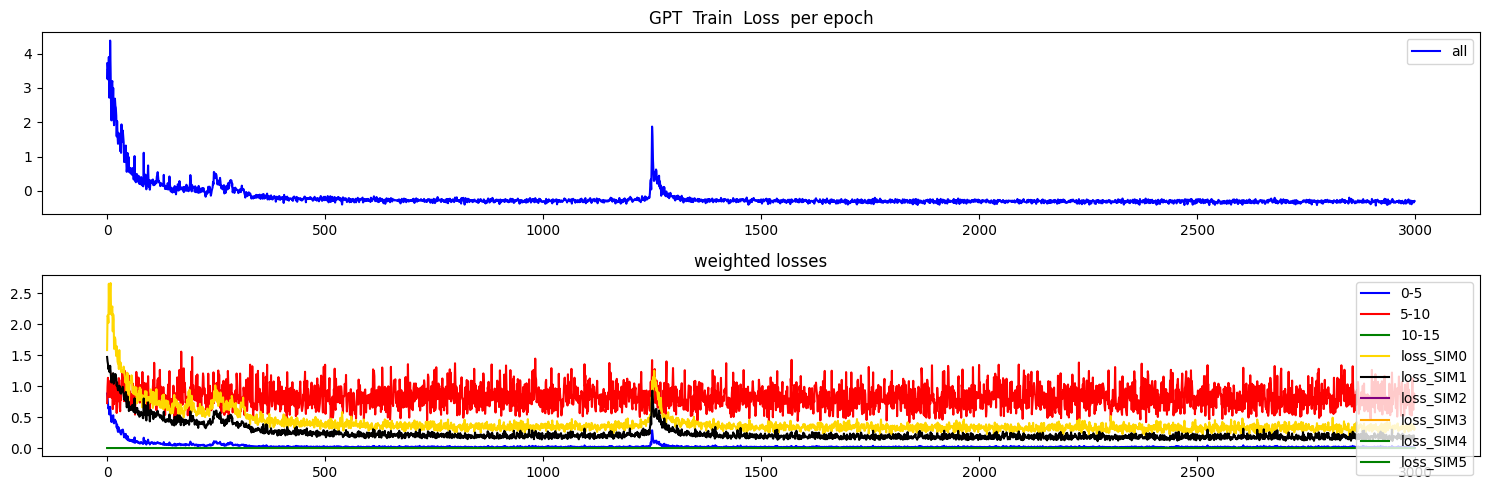

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.026230422779917717
Test MSE Loss - SI only 0-5:  0.014459277503192425
Test MSE Loss - SI only 5-10:  0.02616501785814762
Test MSE Loss - SI only 10-15:  0.017625784501433372
mae, mse, rmse, mape, mspe, rse, corr
(0.12712729, 0.026230419, 0.16195808, 1.7546371, 5.9228616, 1.3314155)
Testing R**2 - SI only:  -0.7726675248983801
Testing R**2 - SI only:  -0.7726675248983801
Testing R**2 - All features:  0.9862525597442492
Testing R**2 - (f2) - SI full:  -1.6442055147555639


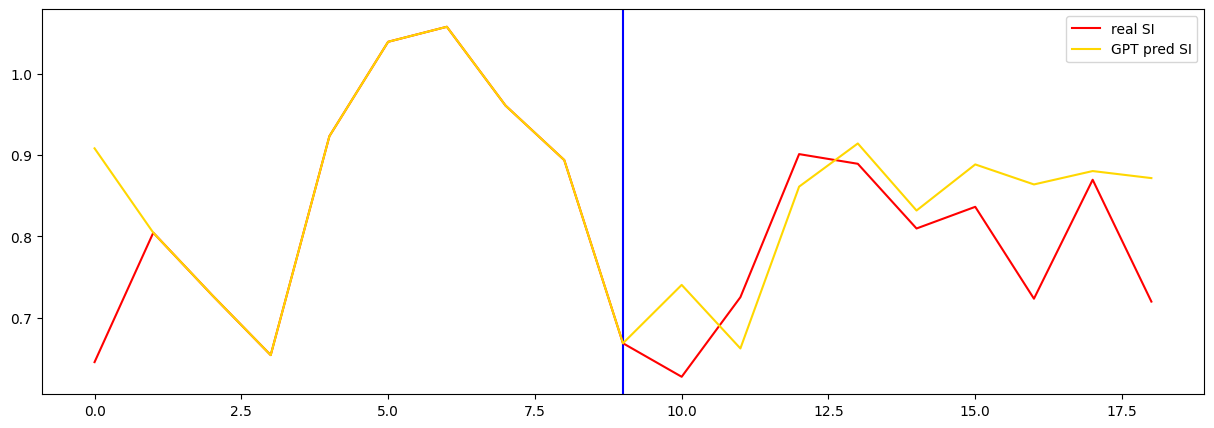

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  8.102680206298828
seq length of pred =  10
[1.51256717 1.94885767 4.32699293 8.72736097 0.78267488 0.49443296]
loss_SI... [tensor(1.5653, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7183, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(8.1027, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(8.1027, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.20836085081100464
seq length of pred =  10
[0.6686953  0.3179716  0.61053885 1.16306115 0.0343441  0.06577245]
loss_SI... [tensor(0.0687, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.6062, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.2084, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.2084, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.2529805898666382
seq length of pred =  10
[0.59488016 0.24241637 0.50911739 0.8484013  0.02816612

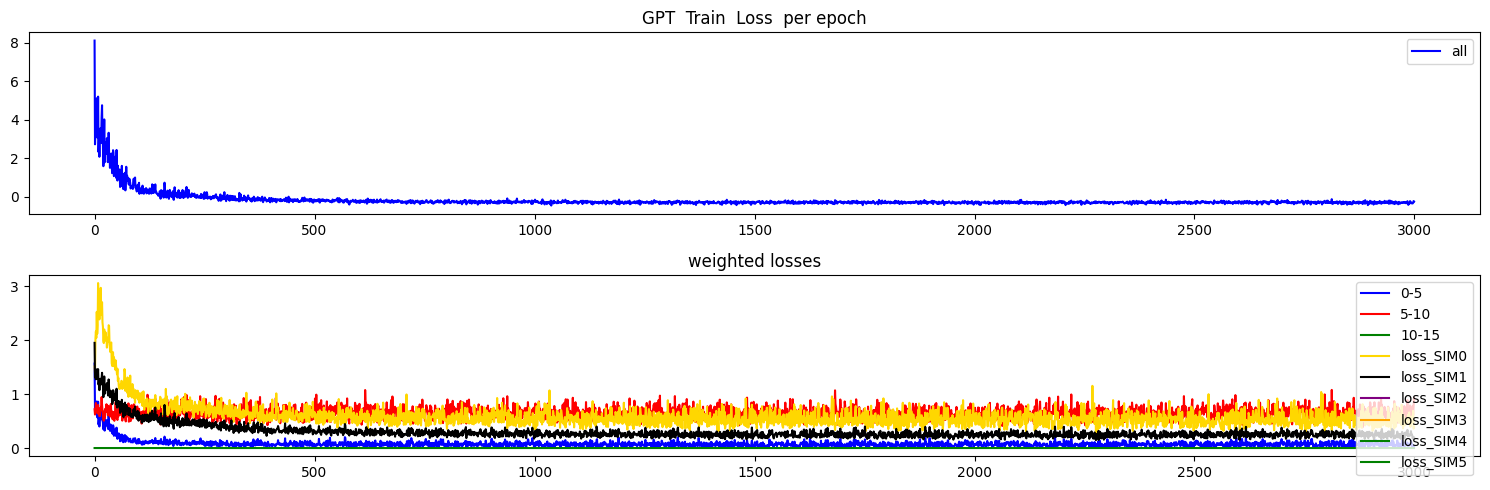

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.022518252953886986
Test MSE Loss - SI only 0-5:  0.014459277503192425
Test MSE Loss - SI only 5-10:  0.013273188844323158
Test MSE Loss - SI only 10-15:  0.01641136221587658
mae, mse, rmse, mape, mspe, rse, corr
(0.12080383, 0.022518251, 0.15006082, 1.5535128, 4.735666, 1.2336112)
Testing R**2 - SI only:  -0.5217967771259475
Testing R**2 - SI only:  -0.5217967771259475
Testing R**2 - All features:  0.9925941923513067
Testing R**2 - (f2) - SI full:  -149.18463388943724


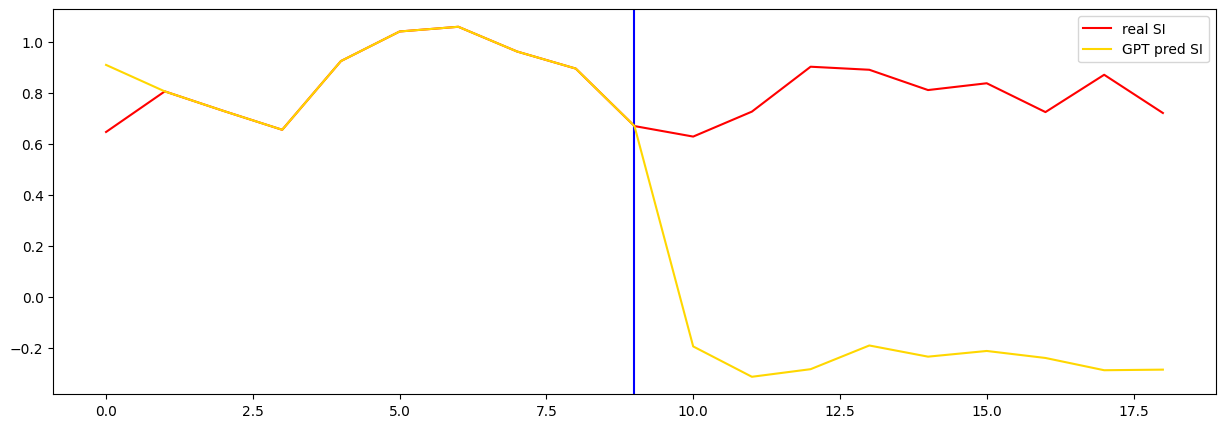

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  4.862435340881348
seq length of pred =  10
[2.20825256 1.66317835 3.35941903 6.24629133 0.44776769 0.34701618]
loss_SI... [tensor(0.8955, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8837, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(4.8624, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(4.8624, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.22061942517757416
seq length of pred =  10
[0.72939195 0.2701082  0.53084932 0.96056637 0.01021095 0.0533648 ]
loss_SI... [tensor(0.0204, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7109, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.2206, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.2206, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.24315762519836426
seq length of pred =  10
[0.31277014 0.19731423 0.37052192 0.71945307 0.0057286

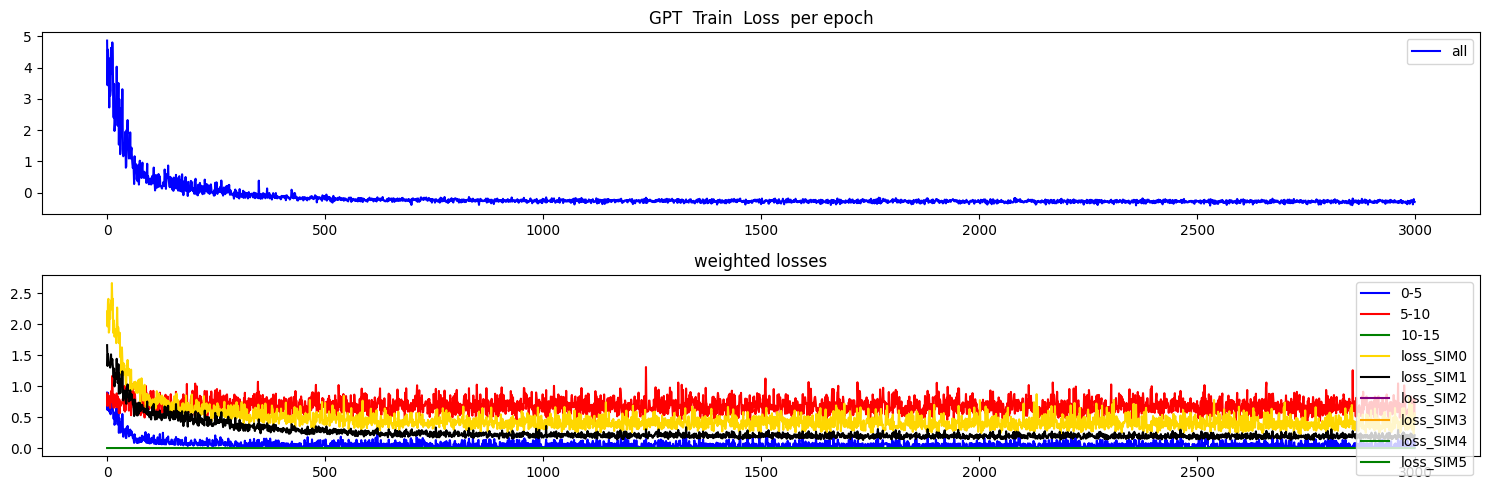

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.025741277262568474
Test MSE Loss - SI only 0-5:  0.014459277503192425
Test MSE Loss - SI only 5-10:  0.027003858238458633
Test MSE Loss - SI only 10-15:  0.014928197488188744
mae, mse, rmse, mape, mspe, rse, corr
(0.12162203, 0.02574128, 0.16044089, 1.672385, 5.586587, 1.3189431)
Testing R**2 - SI only:  -0.7396108926720111
Testing R**2 - SI only:  -0.7396108926720111
Testing R**2 - All features:  0.9880381566232701
Testing R**2 - (f2) - SI full:  -44.68877059804342


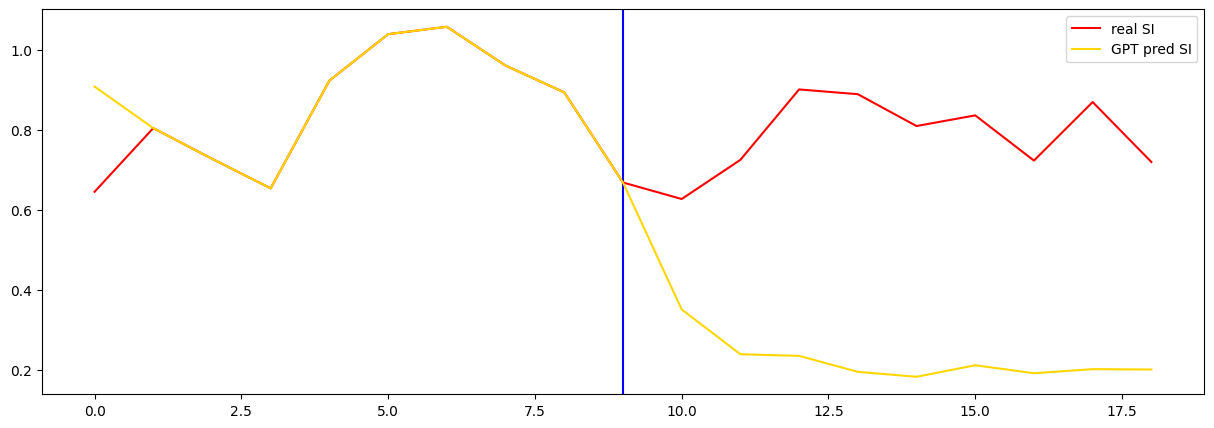

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )



## Run 3


In [28]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  3.3748159408569336
seq length of pred =  10
[1.92715466 1.35524576 3.02184145 5.62040408 0.33794826 0.31224467]
loss_SI... [tensor(0.6759, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8905, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(3.3748, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(3.3748, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.03828480839729309
seq length of pred =  10
[0.42896192 0.45124831 1.13250413 1.66777894 0.27647545 0.12941721]
loss_SI... [tensor(0.5530, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9597, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.0383, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.0383, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.21728961169719696
seq length of pred =  10
[0.51972029 0.47045782 1.49348889 1.86370438 0.419684

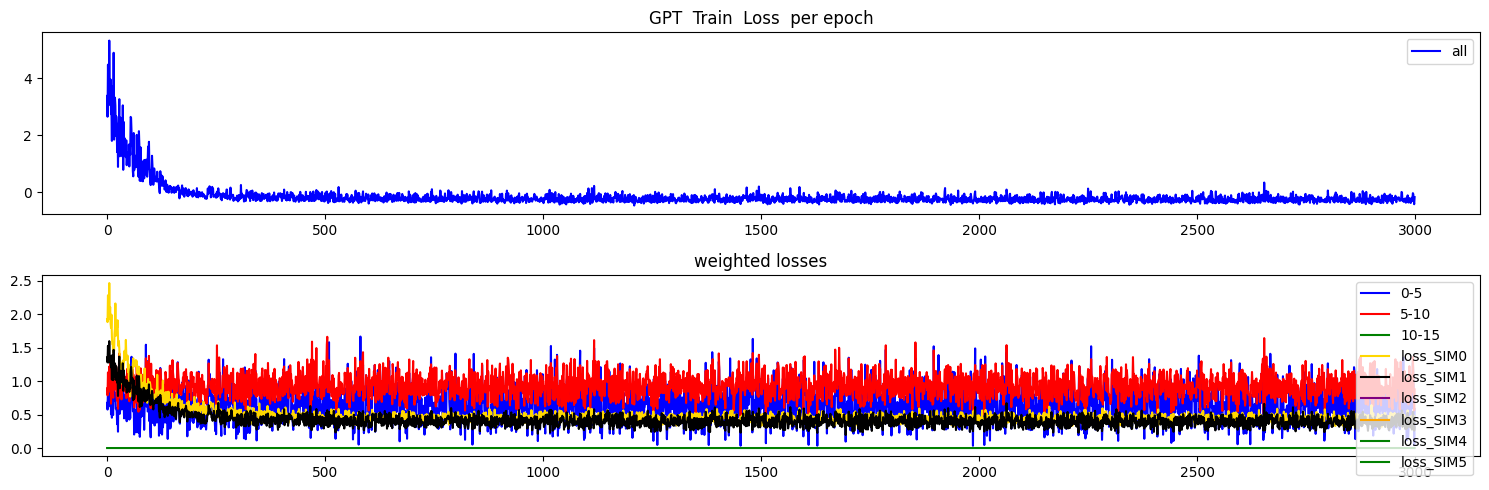

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.5256255269050598
Test MSE Loss - SI only 0-5:  0.2504749298095703
Test MSE Loss - SI only 5-10:  0.08588697016239166
Test MSE Loss - SI only 10-15:  0.02323412150144577
mae, mse, rmse, mape, mspe, rse, corr
(0.4582857, 0.5256255, 0.7250004, 2.6482596, 16.856804, 1.6874849)
Testing R**2 - SI only:  -1.8476054712890972
Testing R**2 - SI only:  -1.8476054712890972
Testing R**2 - All features:  0.9787215072570292
Testing R**2 - (f2) - SI full:  -15.680969988081415


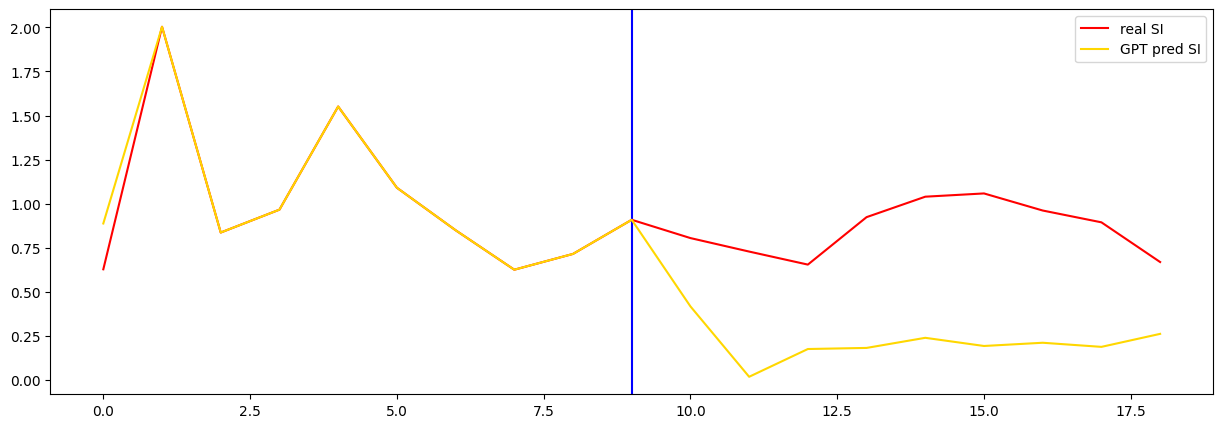

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  5.373294830322266
seq length of pred =  10
[2.09925922 1.53608672 3.17079271 6.8980745  0.56324927 0.39110209]
loss_SI... [tensor(1.1265, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3175, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(5.3733, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(5.3733, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.16931112110614777
seq length of pred =  10
[0.47676376 0.35067903 0.81642927 1.41933342 0.11145454 0.09001712]
loss_SI... [tensor(0.2229, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7626, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.1693, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.1693, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.23082827031612396
seq length of pred =  10
[0.39101049 0.25845919 0.49492387 0.95307271 0.0414422

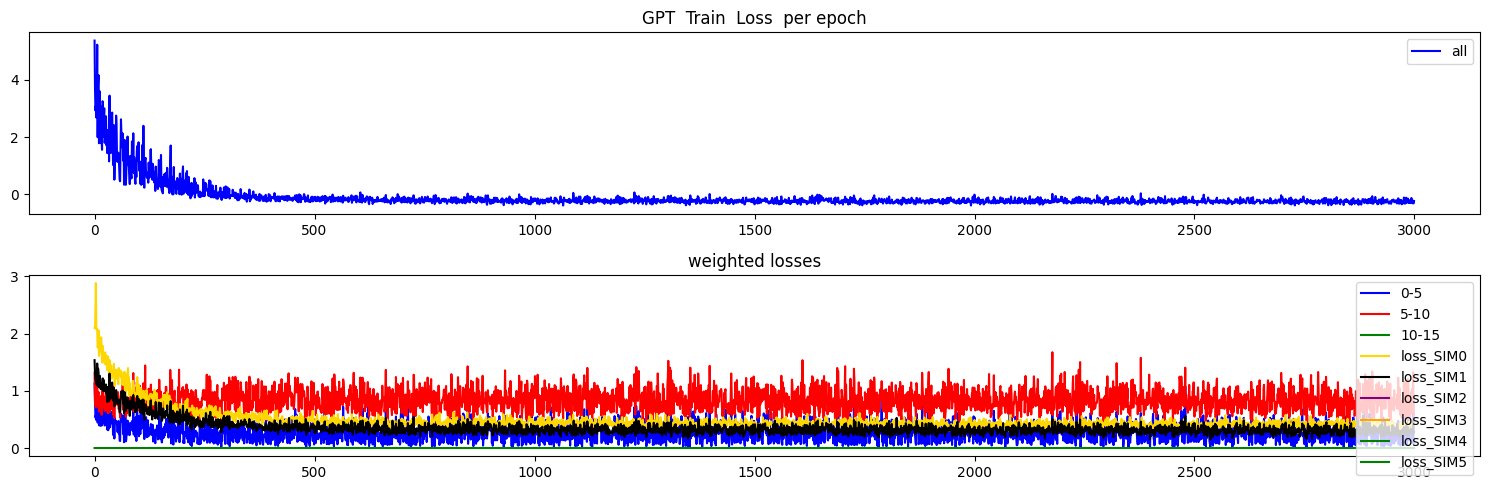

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.5100639462471008
Test MSE Loss - SI only 0-5:  0.2504749298095703
Test MSE Loss - SI only 5-10:  0.04000493139028549
Test MSE Loss - SI only 10-15:  0.009982440620660782
mae, mse, rmse, mape, mspe, rse, corr
(0.4188281, 0.51006395, 0.7141876, 1.6032726, 7.249595, 1.6623176)
Testing R**2 - SI only:  -1.7633001462530986
Testing R**2 - SI only:  -1.7633001462530986
Testing R**2 - All features:  0.9759106453511355
Testing R**2 - (f2) - SI full:  -24.971037312036863


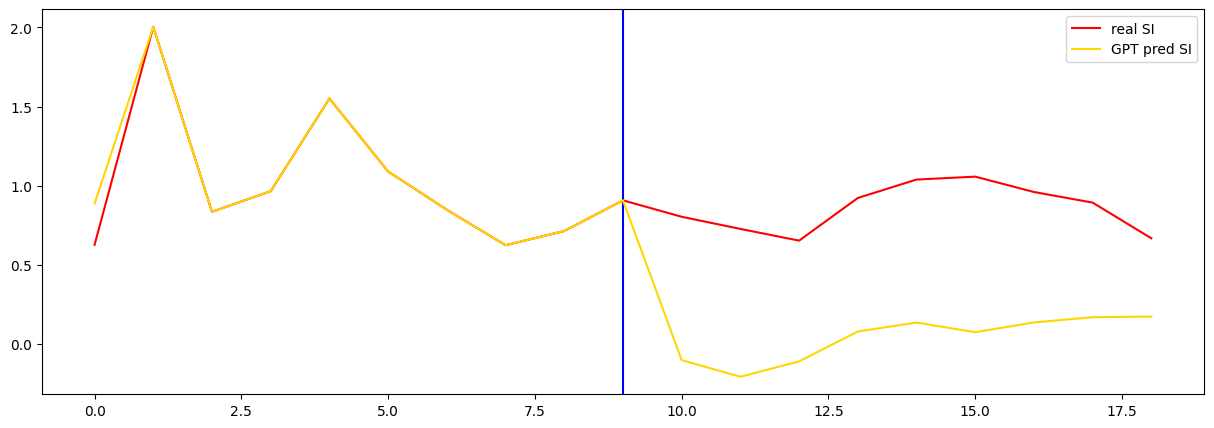

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  4.742903709411621
seq length of pred =  10
[1.93110187 1.54920197 2.97771901 5.96117676 0.40888028 0.33117944]
loss_SI... [tensor(0.8178, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7208, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(4.7429, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(4.7429, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.18662771582603455
seq length of pred =  10
[0.51185483 0.36860007 0.72929449 1.23714069 0.04750167 0.07101328]
loss_SI... [tensor(0.0950, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7435, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.1866, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.1866, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.22811385989189148
seq length of pred =  10
[0.44698741 0.21851312 0.45129037 0.83775696 0.0173799

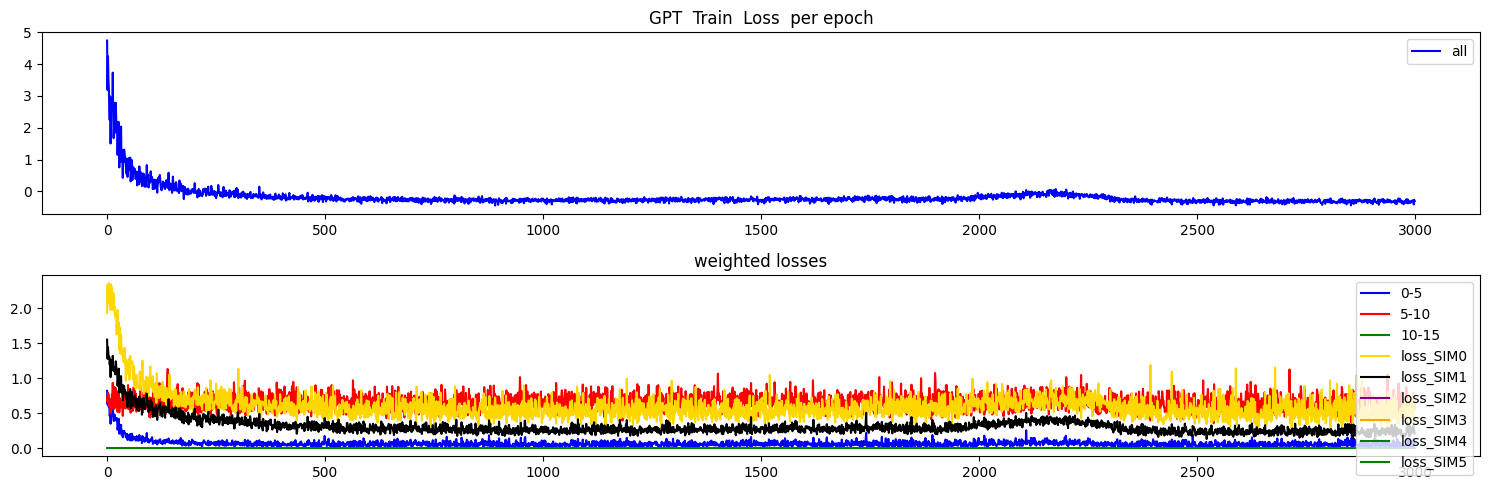

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.5196935534477234
Test MSE Loss - SI only 0-5:  0.2504749298095703
Test MSE Loss - SI only 5-10:  0.03636883571743965
Test MSE Loss - SI only 10-15:  0.050211358815431595
mae, mse, rmse, mape, mspe, rse, corr
(0.45530835, 0.5196936, 0.7208978, 2.3967454, 10.85603, 1.677936)
Testing R**2 - SI only:  -1.8154695403358807
Testing R**2 - SI only:  -1.8154695403358807
Testing R**2 - All features:  0.9782193986267292
Testing R**2 - (f2) - SI full:  -5.825344616063445


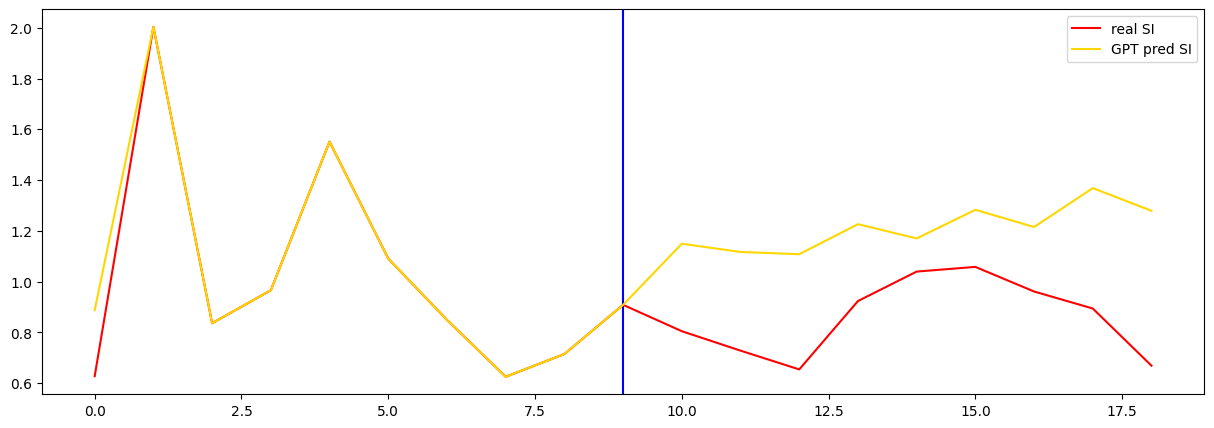

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  4.562080383300781
seq length of pred =  10
[2.4143014  1.50550385 2.80674747 5.7942323  0.41284843 0.32207093]
loss_SI... [tensor(0.8257, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8706, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(4.5621, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(4.5621, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.22263917326927185
seq length of pred =  10
[0.41253409 0.22465047 0.43350716 0.82705056 0.0072504  0.04594725]
loss_SI... [tensor(0.0145, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.5964, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.2226, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.2226, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.27647289633750916
seq length of pred =  10
[0.50324278 0.16979349 0.30305904 0.69478902 0.0047581

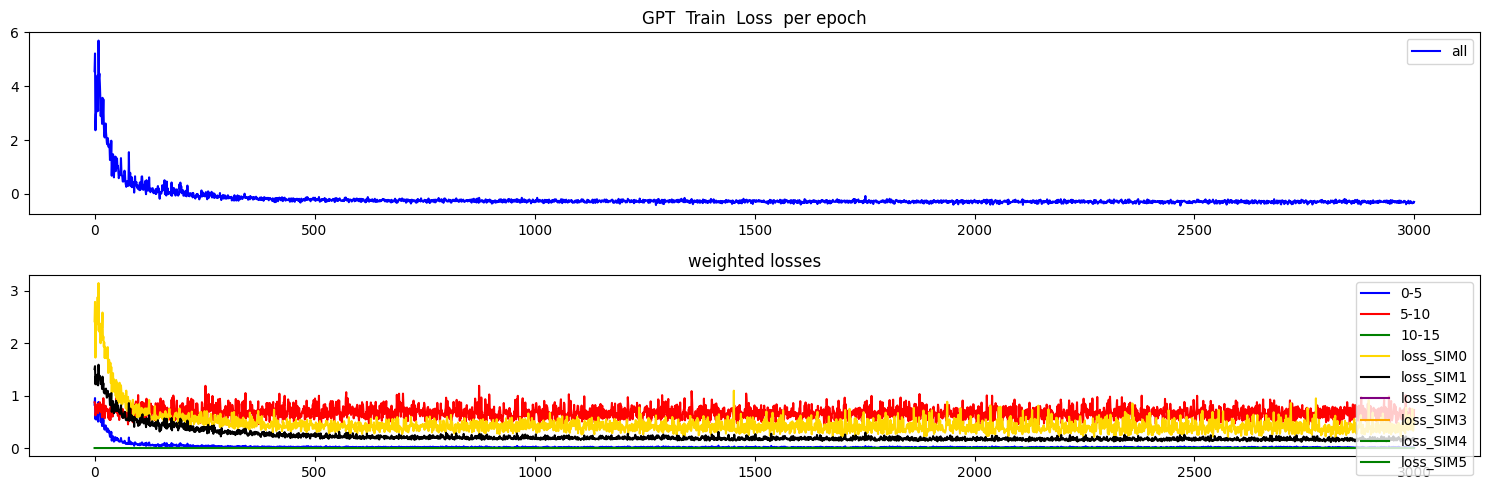

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.5197703838348389
Test MSE Loss - SI only 0-5:  0.2504749298095703
Test MSE Loss - SI only 5-10:  0.032567523419857025
Test MSE Loss - SI only 10-15:  0.05430404096841812
mae, mse, rmse, mape, mspe, rse, corr
(0.45381597, 0.5197704, 0.720951, 2.4088545, 11.037564, 1.6780598)
Testing R**2 - SI only:  -1.8158849323626982
Testing R**2 - SI only:  -1.8158849323626982
Testing R**2 - All features:  0.9729181501493215
Testing R**2 - (f2) - SI full:  -11.481389142815502


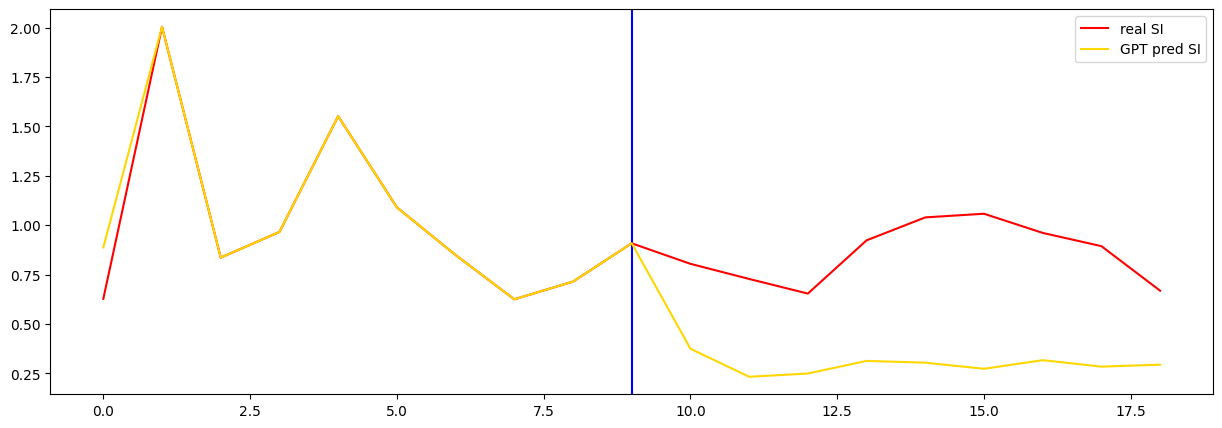

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )



## Run 4


In [33]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  4.392614364624023
seq length of pred =  10
[1.6422675  1.57834716 3.49007997 6.55140465 0.46288594 0.36779226]
loss_SI... [tensor(0.9258, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1744, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(4.3926, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(4.3926, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.3747890591621399
seq length of pred =  10
[0.69228368 0.24770026 0.5649955  0.98966608 0.07529057 0.06612736]
loss_SI... [tensor(0.1506, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9700, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.3748, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.3748, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.4145006835460663
seq length of pred =  10
[1.23350744 0.25094756 0.56622431 1.01719672 0.08080258 

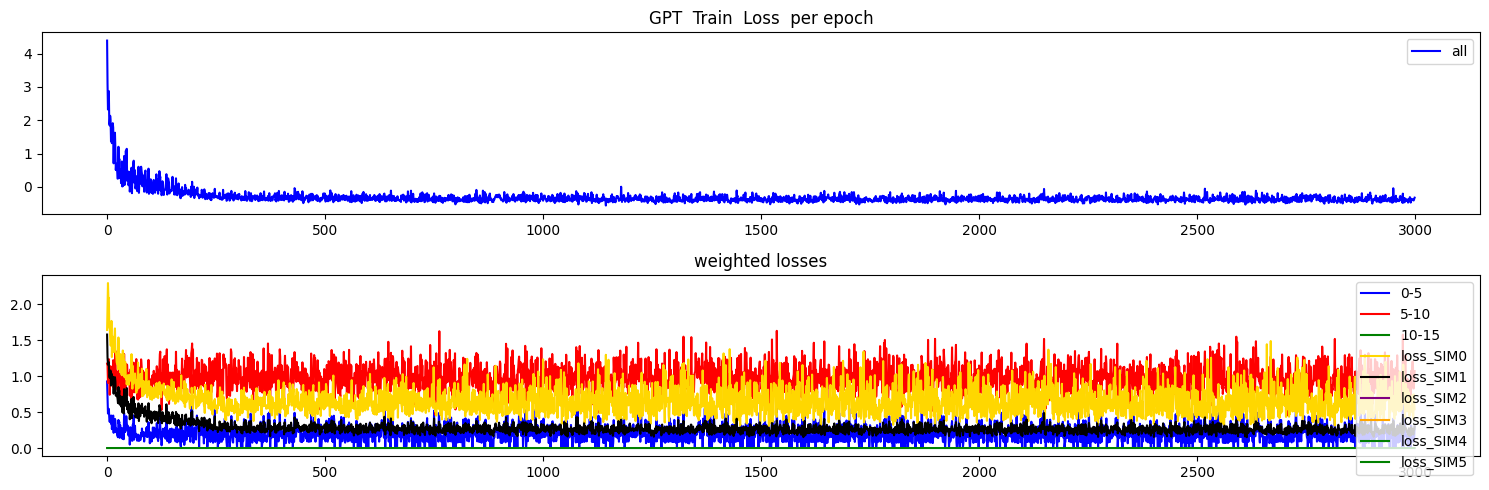

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.030133049935102463
Test MSE Loss - SI only 0-5:  0.05489959195256233
Test MSE Loss - SI only 5-10:  0.03150501847267151
Test MSE Loss - SI only 10-15:  0.022189930081367493
mae, mse, rmse, mape, mspe, rse, corr
(0.1448187, 0.03013305, 0.17358874, 7.7050853, 489.47012, 1.3995699)
Testing R**2 - SI only:  -0.9587958778278498
Testing R**2 - SI only:  -0.9587958778278498
Testing R**2 - All features:  0.9965856214477469
Testing R**2 - (f2) - SI full:  -50.09418192268562


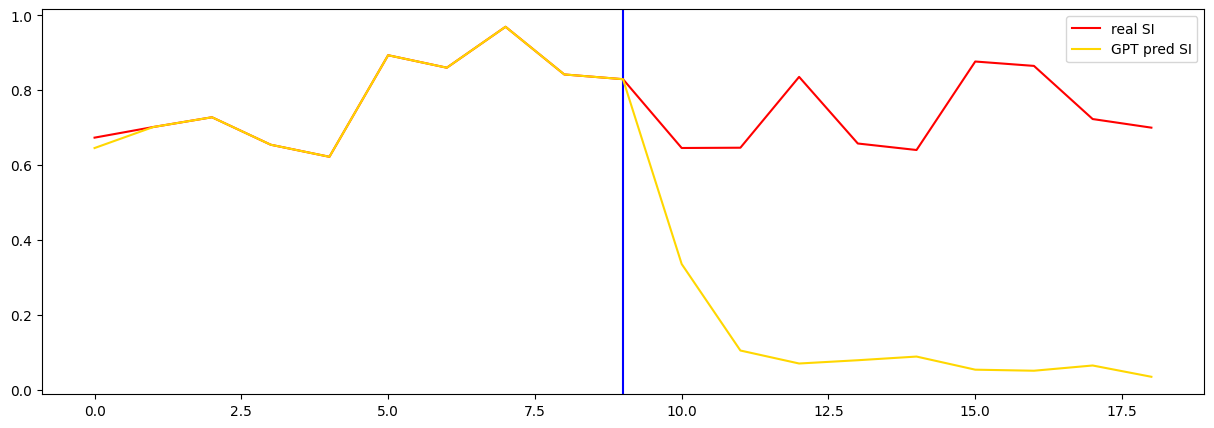

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  3.215517044067383
seq length of pred =  10
[2.07674899 1.36670592 3.02091191 5.73072639 0.33210658 0.31848875]
loss_SI... [tensor(0.6642, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8695, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(3.2155, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(3.2155, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.22009491920471191
seq length of pred =  10
[0.36040415 0.18357792 0.34026577 0.71049834 0.00506733 0.03947213]
loss_SI... [tensor(0.0101, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.6750, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.2201, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.2201, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.2987462282180786
seq length of pred =  10
[0.36754596 0.22563165 0.42225453 0.72739382 0.00961524

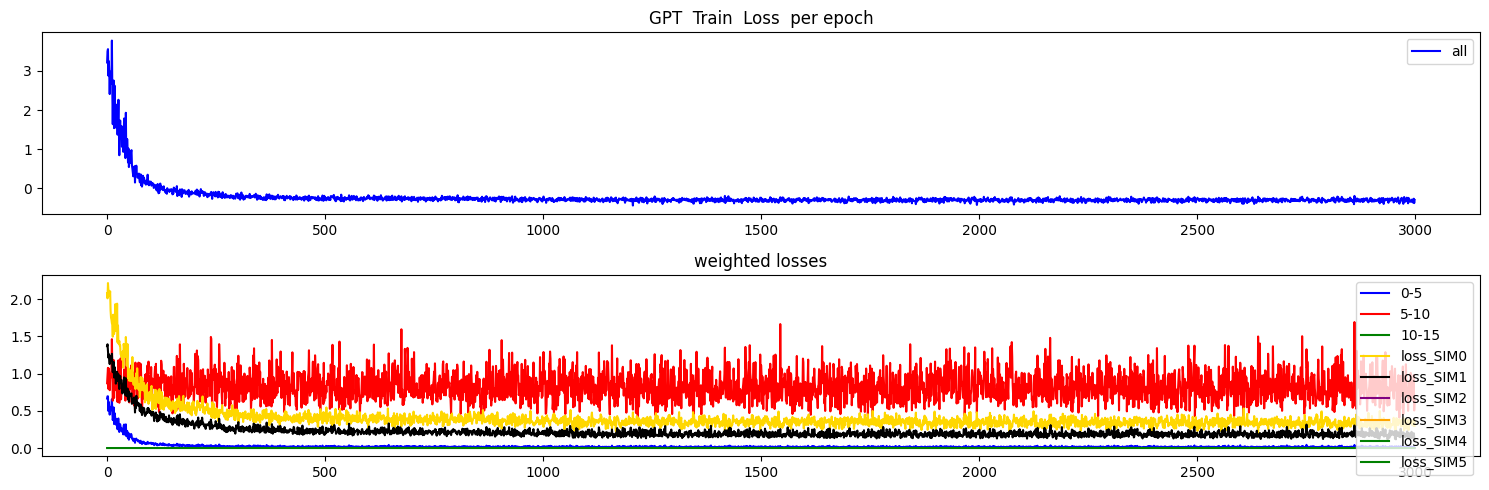

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.026269445195794106
Test MSE Loss - SI only 0-5:  0.05489959195256233
Test MSE Loss - SI only 5-10:  0.023808863013982773
Test MSE Loss - SI only 10-15:  0.015204383060336113
mae, mse, rmse, mape, mspe, rse, corr
(0.13292062, 0.026269445, 0.16207851, 4.0725136, 82.32276, 1.3067681)
Testing R**2 - SI only:  -0.7076425937140469
Testing R**2 - SI only:  -0.7076425937140469
Testing R**2 - All features:  0.9939185940689609
Testing R**2 - (f2) - SI full:  -7.562313572547536


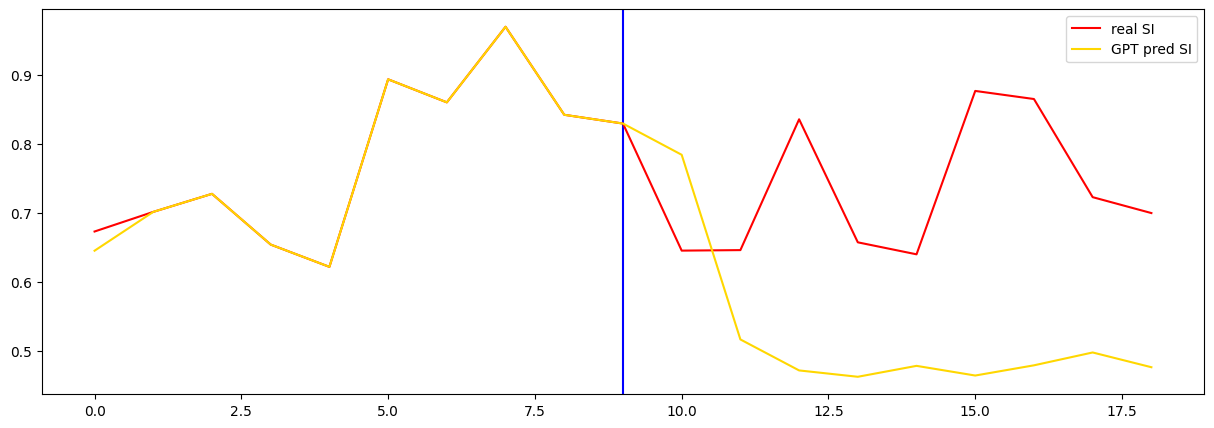

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  5.200246334075928
seq length of pred =  10
[3.33292919 1.42907551 2.90472286 5.87133857 0.41742226 0.32618548]
loss_SI... [tensor(0.8348, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9313, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(5.2002, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(5.2002, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.09666372090578079
seq length of pred =  10
[0.48204773 0.34974475 0.89099195 1.4566154  0.13048157 0.09434174]
loss_SI... [tensor(0.2610, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.6346, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.0967, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.0967, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.265494704246521
seq length of pred =  10
[0.5879515  0.32583761 0.87642713 1.30875446 0.13700446 

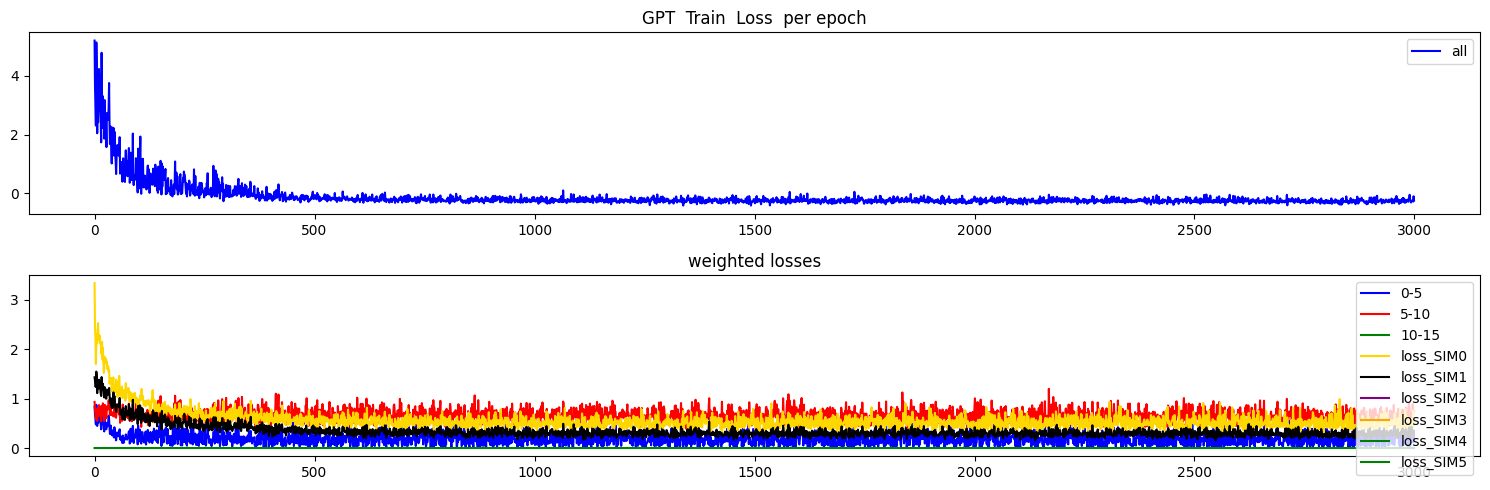

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.03925812244415283
Test MSE Loss - SI only 0-5:  0.05489959195256233
Test MSE Loss - SI only 5-10:  0.05067123845219612
Test MSE Loss - SI only 10-15:  0.037698980420827866
mae, mse, rmse, mape, mspe, rse, corr
(0.17179002, 0.039258122, 0.19813663, 15.945976, 2777.2317, 1.5974888)
Testing R**2 - SI only:  -1.5519701743946421
Testing R**2 - SI only:  -1.5519701743946421
Testing R**2 - All features:  0.9616867932814234
Testing R**2 - (f2) - SI full:  -0.2749976926241522


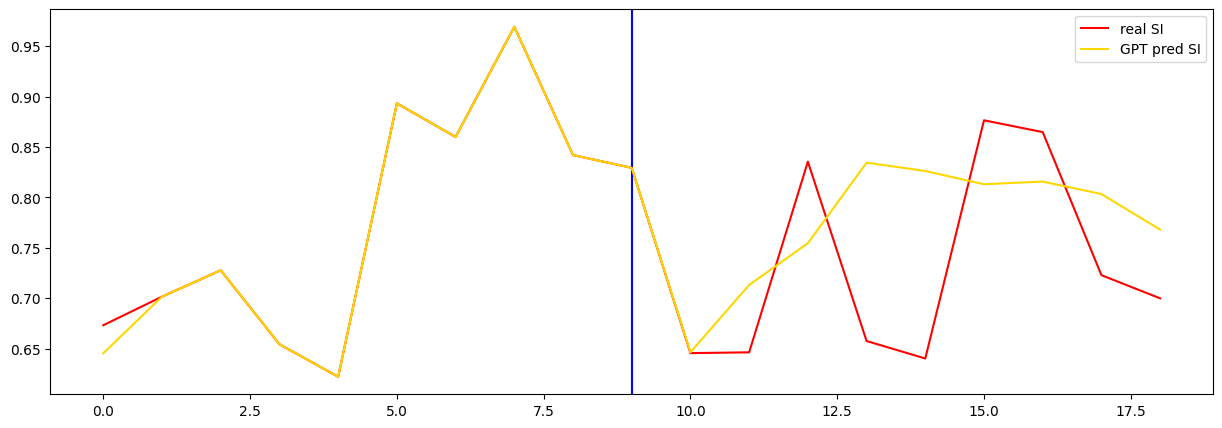

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  4.6389312744140625
seq length of pred =  10
[1.83730997 1.58408757 3.80399884 6.72528671 0.5342325  0.38011983]
loss_SI... [tensor(1.0685, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8255, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(4.6389, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(4.6389, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.18700462579727173
seq length of pred =  10
[0.38856248 0.27093847 0.54556772 0.9493923  0.02761408 0.05521586]
loss_SI... [tensor(0.0552, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7319, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.1870, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.1870, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.2972590923309326
seq length of pred =  10
[0.49538858 0.22268266 0.40291215 0.7716522  0.0091058

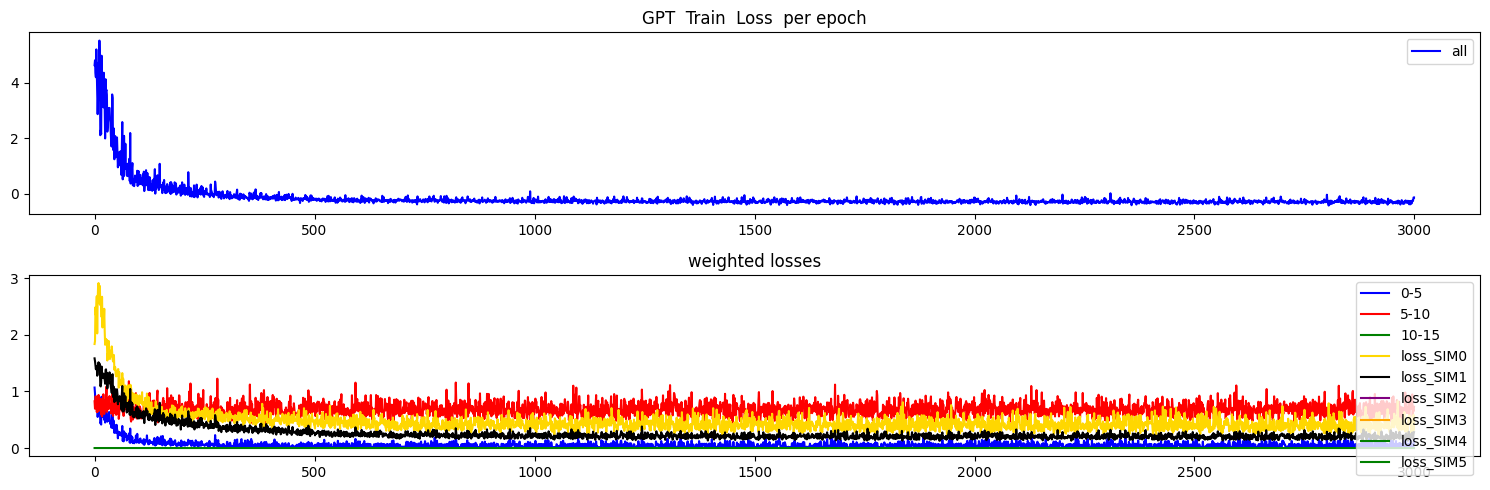

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.024755781516432762
Test MSE Loss - SI only 0-5:  0.05489959195256233
Test MSE Loss - SI only 5-10:  0.018503163009881973
Test MSE Loss - SI only 10-15:  0.014758164994418621
mae, mse, rmse, mape, mspe, rse, corr
(0.12870027, 0.024755783, 0.1573397, 4.3084426, 106.39579, 1.2685611)
Testing R**2 - SI only:  -0.6092470344880916
Testing R**2 - SI only:  -0.6092470344880916
Testing R**2 - All features:  0.9852183298351234
Testing R**2 - (f2) - SI full:  -13.601499078620371


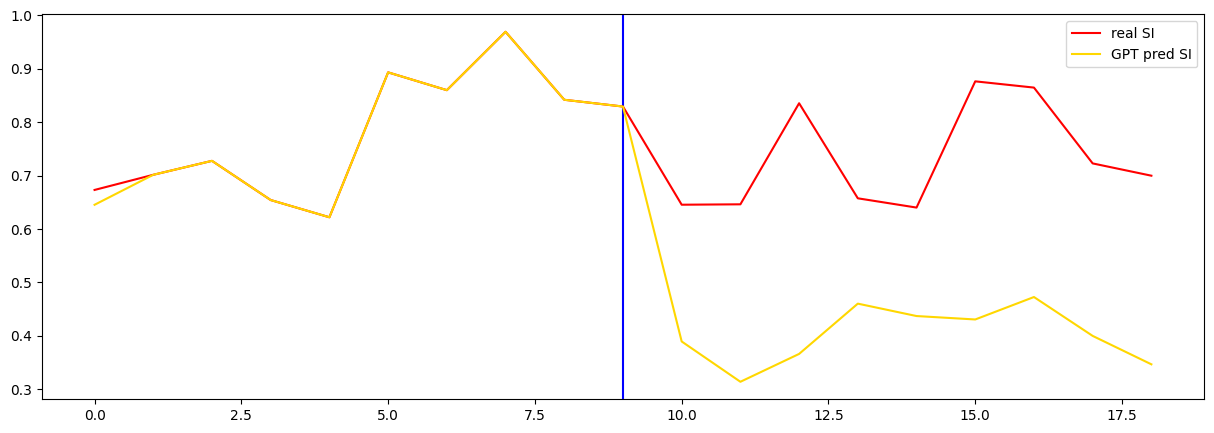

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )



## Run 5


In [38]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  6.166892051696777
seq length of pred =  10
[2.02325959 1.81633672 4.00807482 7.22828868 0.62478066 0.41118942]
loss_SI... [tensor(1.2496, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9719, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(6.1669, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(6.1669, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.08763323724269867
seq length of pred =  10
[0.32421292 0.27271451 0.69158697 1.14962741 0.0630734  0.07090657]
loss_SI... [tensor(0.1261, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7311, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.0876, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.0876, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.14348283410072327
seq length of pred =  10
[0.20276549 0.25508777 0.6777078  1.0109488  0.0720696

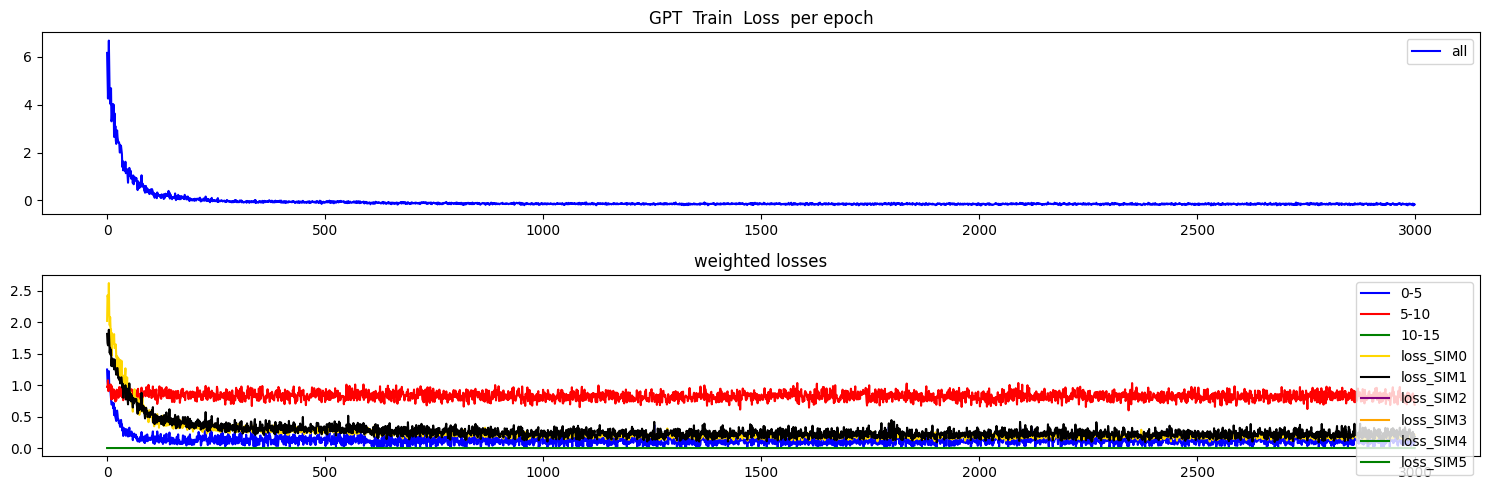

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.04697456955909729
Test MSE Loss - SI only 0-5:  0.03623269870877266
Test MSE Loss - SI only 5-10:  0.04643603041768074
Test MSE Loss - SI only 10-15:  0.056931059807538986
mae, mse, rmse, mape, mspe, rse, corr
(0.18119371, 0.04697457, 0.21673617, 16.476324, 2063.0437, 1.1416727)
Testing R**2 - SI only:  -0.30341643005204366
Testing R**2 - SI only:  -0.30341643005204366
Testing R**2 - All features:  0.9582405391880727
Testing R**2 - (f2) - SI full:  0.17495318357138512


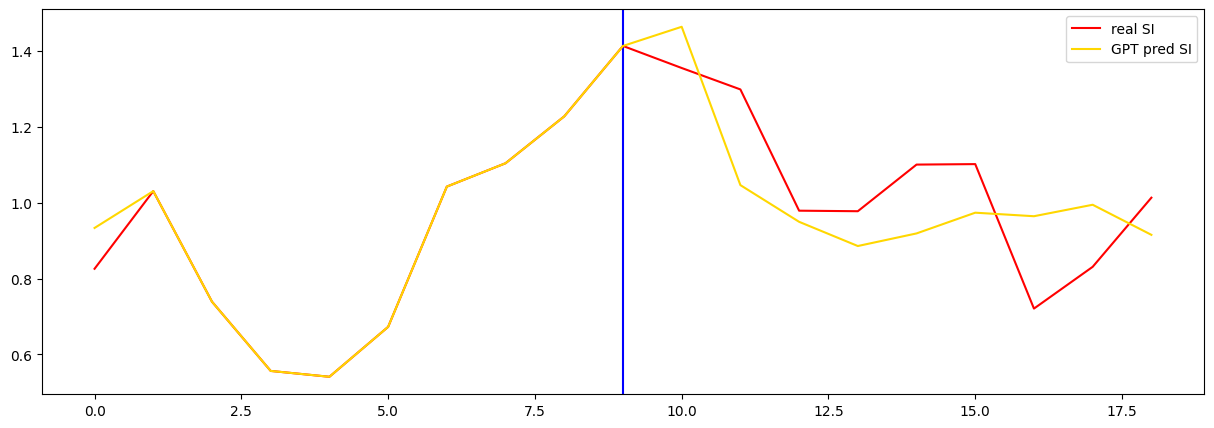

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  2.467348098754883
seq length of pred =  10
[1.49324979 1.24117107 2.39970046 4.86682652 0.2288591  0.27037925]
loss_SI... [tensor(0.4577, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.5986, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(2.4673, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(2.4673, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.4524018168449402
seq length of pred =  10
[0.66899608 0.5082764  2.5971358  2.60036141 1.20623866 0.25293307]
loss_SI... [tensor(2.4125, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.0358, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.4524, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.4524, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.18271152675151825
seq length of pred =  10
[0.55880821 0.32093972 1.23726185 1.36065769 0.50082937 0.

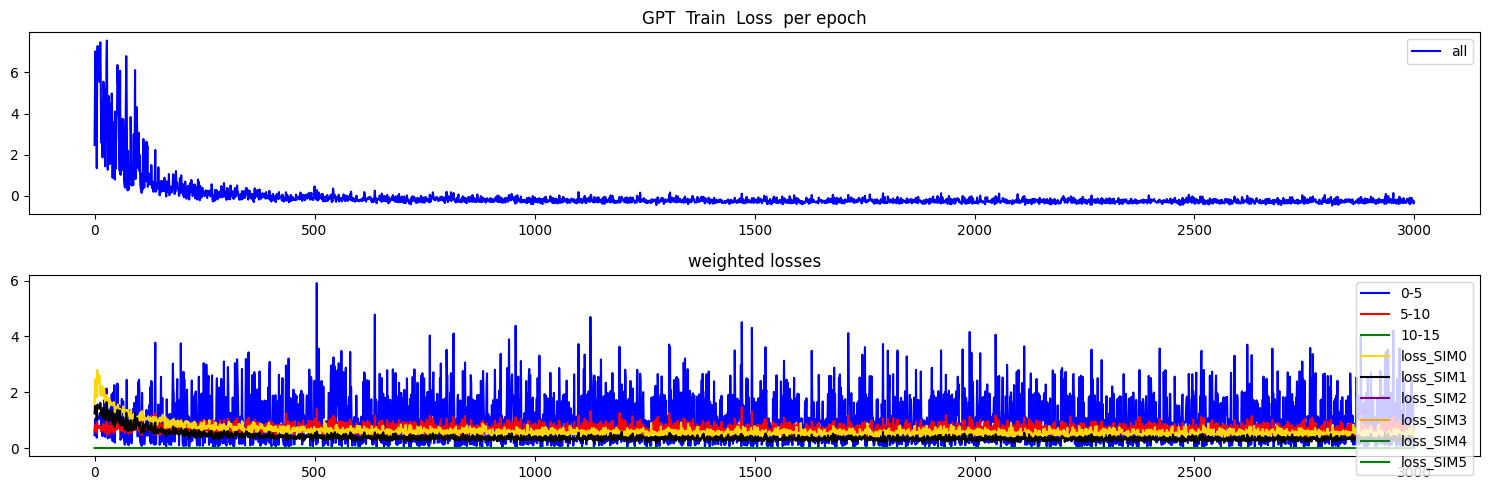

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.06261272728443146
Test MSE Loss - SI only 0-5:  0.03623269870877266
Test MSE Loss - SI only 5-10:  0.07863890379667282
Test MSE Loss - SI only 10-15:  0.0841531902551651
mae, mse, rmse, mape, mspe, rse, corr
(0.20089693, 0.06261272, 0.25022534, 14.113948, 1467.2952, 1.3180791)
Testing R**2 - SI only:  -0.7373329262505557
Testing R**2 - SI only:  -0.7373329262505557
Testing R**2 - All features:  0.9193763877683908
Testing R**2 - (f2) - SI full:  0.41546943032616346


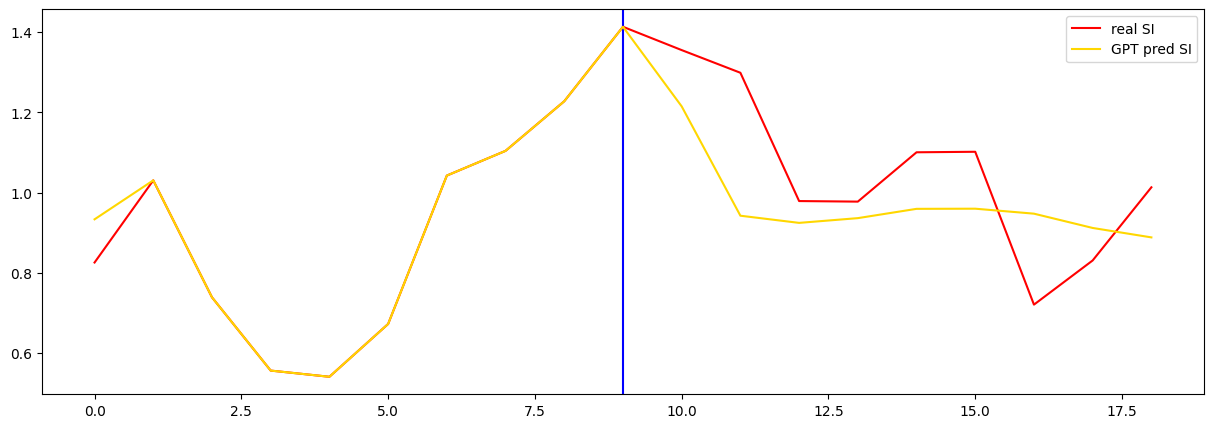

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  1.8471482992172241
seq length of pred =  10
[1.94139038 1.11494642 2.36379677 4.73389484 0.23310185 0.26333324]
loss_SI... [tensor(0.4662, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.6384, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.8471, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.8471, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.19564373791217804
seq length of pred =  10
[0.48553912 0.26419894 0.49167551 0.89768164 0.00876681 0.0498712 ]
loss_SI... [tensor(0.0175, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.4103, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.1956, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.1956, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.24309572577476501
seq length of pred =  10
[0.42192986 0.26262618 0.91832588 0.90405662 0.545055

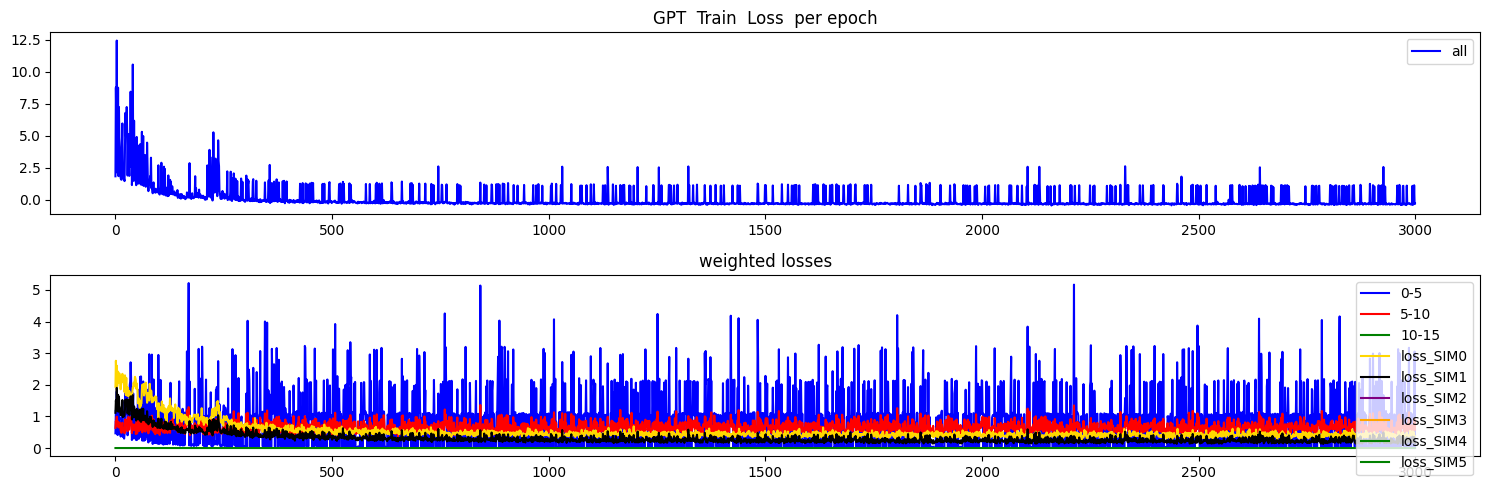

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.05856865271925926
Test MSE Loss - SI only 0-5:  0.03623269870877266
Test MSE Loss - SI only 5-10:  0.0617232508957386
Test MSE Loss - SI only 10-15:  0.0857013612985611
mae, mse, rmse, mape, mspe, rse, corr
(0.20668335, 0.058568653, 0.24200961, 21.696932, 3726.637, 1.2748022)
Testing R**2 - SI only:  -0.6251207270139763
Testing R**2 - SI only:  -0.6251207270139763
Testing R**2 - All features:  0.8579343411240073
Testing R**2 - (f2) - SI full:  -0.08951370042532392


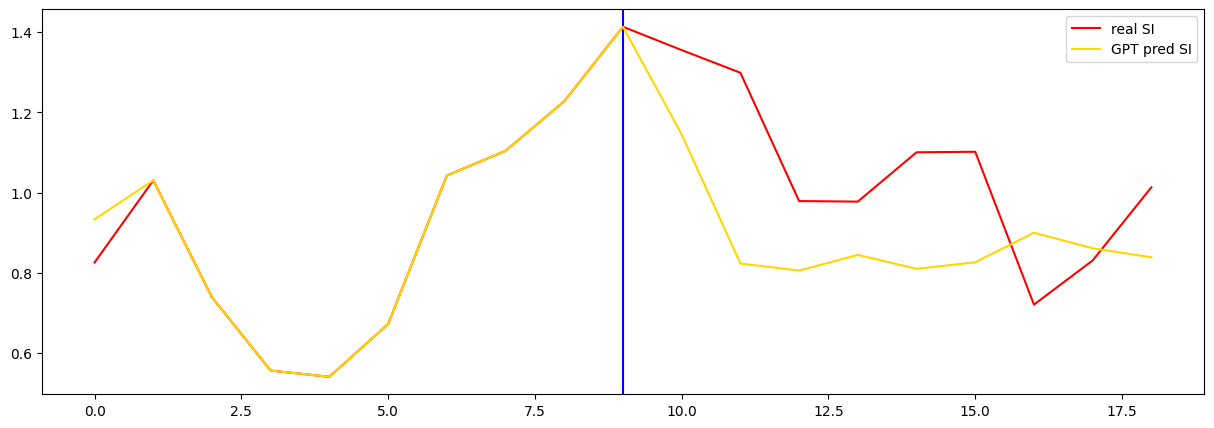

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  14.093405723571777
seq length of pred =  10
[3.23767306 1.8746813  3.28908908 6.7655483  0.95649123 0.37586379]
loss_SI... [tensor(1.9130, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.0214, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(14.0934, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(14.0934, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.14565962553024292
seq length of pred =  10
[0.53619425 0.28142252 0.4795286  0.91042678 0.01144534 0.05057927]
loss_SI... [tensor(0.0229, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7192, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.1457, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.1457, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.12197668850421906
seq length of pred =  10
[0.47493255 0.28121155 0.50832144 1.00906463 0.0142

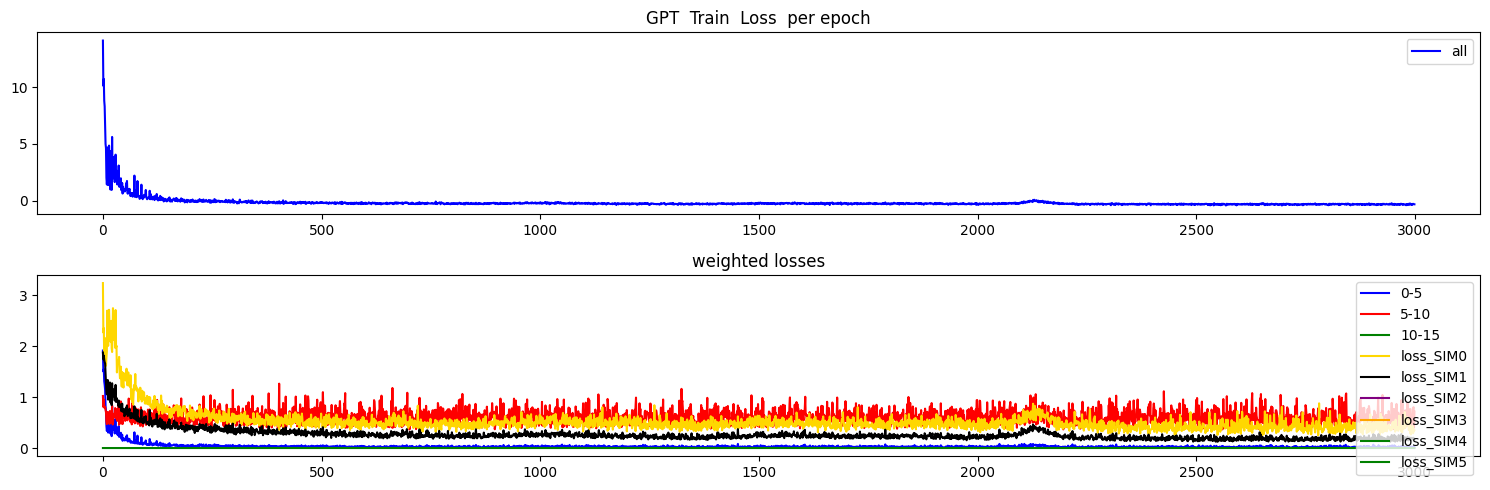

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.039883244782686234
Test MSE Loss - SI only 0-5:  0.03623269870877266
Test MSE Loss - SI only 5-10:  0.03420199826359749
Test MSE Loss - SI only 10-15:  0.04221805930137634
mae, mse, rmse, mape, mspe, rse, corr
(0.16469444, 0.039883245, 0.1997079, 2.257456, 13.05828, 1.051975)
Testing R**2 - SI only:  -0.10665151070717971
Testing R**2 - SI only:  -0.10665151070717971
Testing R**2 - All features:  0.9299417736980224
Testing R**2 - (f2) - SI full:  -7.3070939324594395


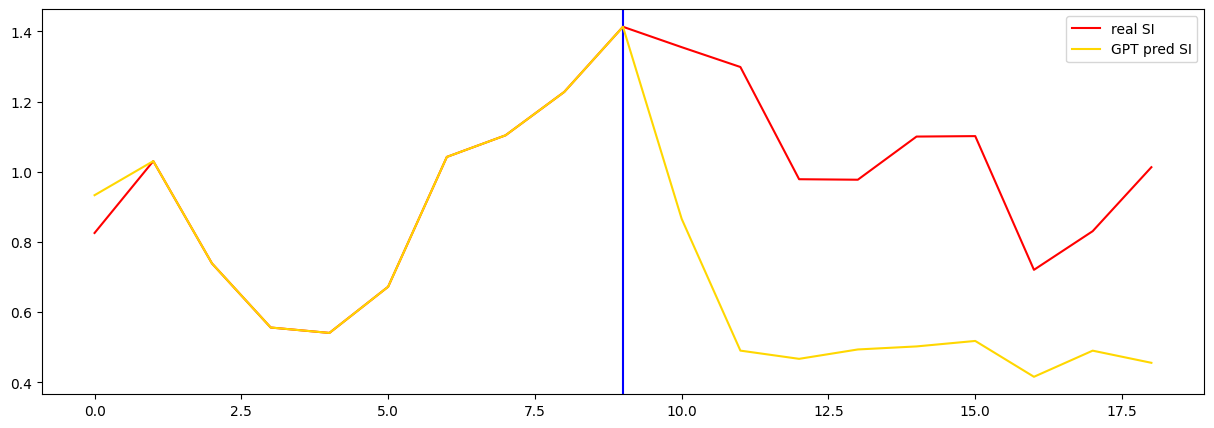

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )



## Train on Train, Test on Train



## 000 to 015


In [ ]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


In [ ]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


In [ ]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


In [ ]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


In [ ]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


In [ ]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


In [ ]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [ ]:
 
## inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [ ]:

## tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
